<a href="https://colab.research.google.com/github/Grelatif/Data_Science/blob/main/Projects/Classical_Frameworks/Student_Performance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Performance Data - Kaggle dataset




Plan du projet

Exploration des données

Chargement du dataset
Analyse exploratoire (distribution des notes, valeurs manquantes, etc.)
Visualisation des relations entre les variables

Prétraitement des données

Gestion des valeurs manquantes
Encodage des variables catégoriques
Normalisation des variables numériques

Modélisation

Séparation en train/test
Choix du modèle (régression pour prédire une note, classification pour déterminer la réussite/échec)
Comparaison des modèles (Random Forest, XGBoost, SVM, etc.)

Évaluation et optimisation

Mesure des performances (accuracy, RMSE, R²)
Feature engineering (création de nouvelles variables pertinentes)
Optimisation des hyperparamètres

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Chargement du dataset
# Variables description https://github.com/meizmyang/Student-Performance-Classification-Analysis/blob/master/student.txt

df = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/Student_Performance_Data/student_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
pd.set_option('display.max_columns', None)

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.isnull().sum()
# No missing values!

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


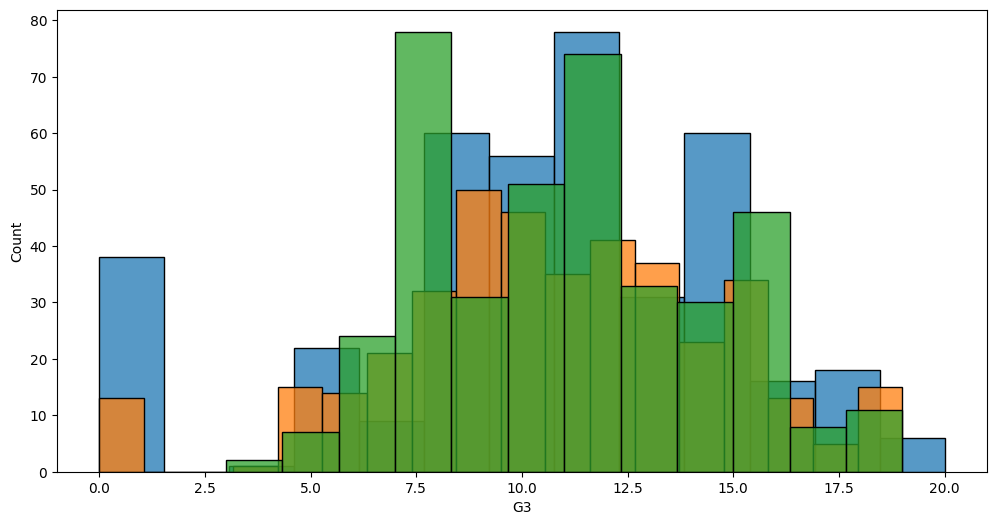

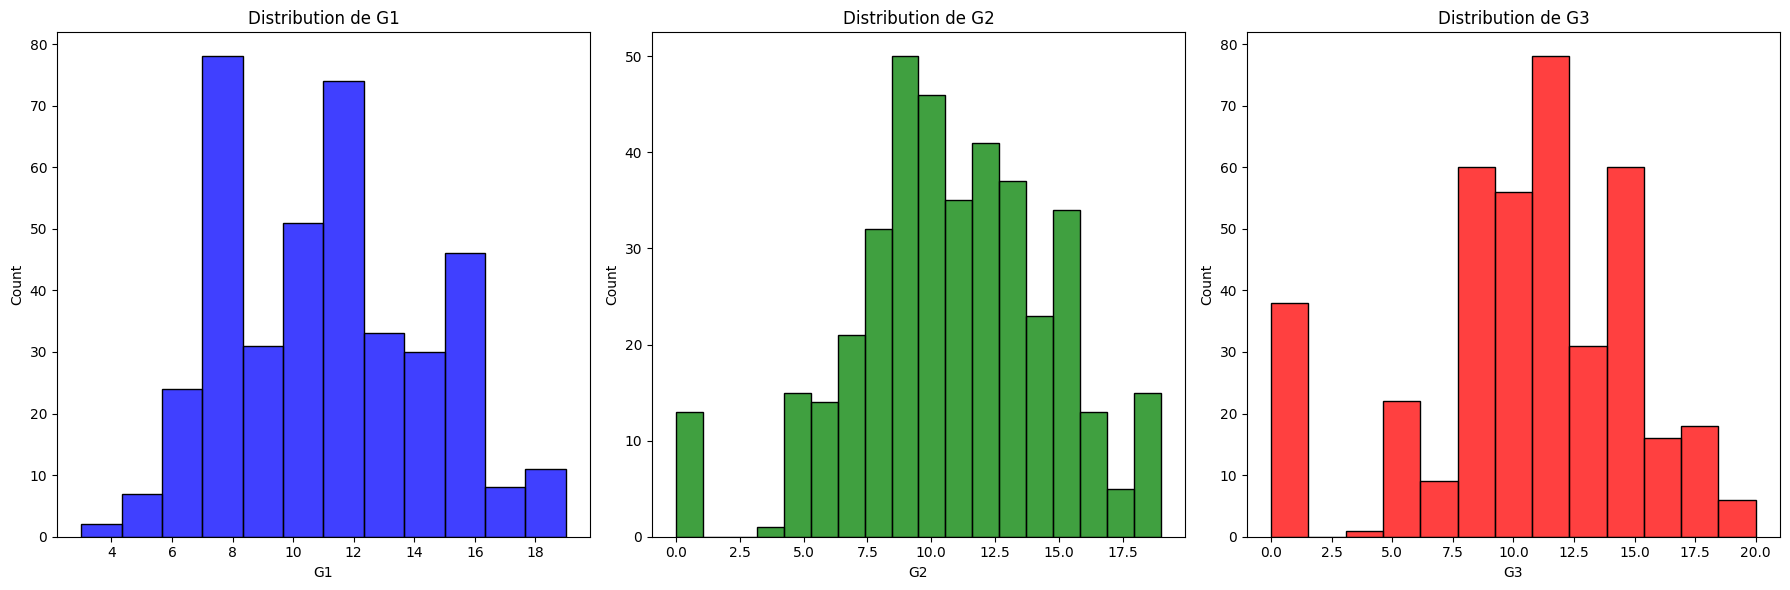

In [ ]:
# let's check the distribution of the target:
plt.figure(figsize=(12,6))
sns.histplot(df["G3"])
sns.histplot(df["G2"])
sns.histplot(df["G1"])
plt.show()

# or 3 plots

# Créer la figure avec 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

# Histogramme de G1
sns.histplot(df["G1"], ax=axes[0], color="blue")
axes[0].set_title("Distribution de G1")

# Histogramme de G2
sns.histplot(df["G2"], ax=axes[1], color="green")
axes[1].set_title("Distribution de G2")

# Histogramme de G3
sns.histplot(df["G3"], ax=axes[2], color="red")
axes[2].set_title("Distribution de G3")

# Afficher le graphique
plt.tight_layout()  # Ajuste les espaces entre les subplots
plt.show()


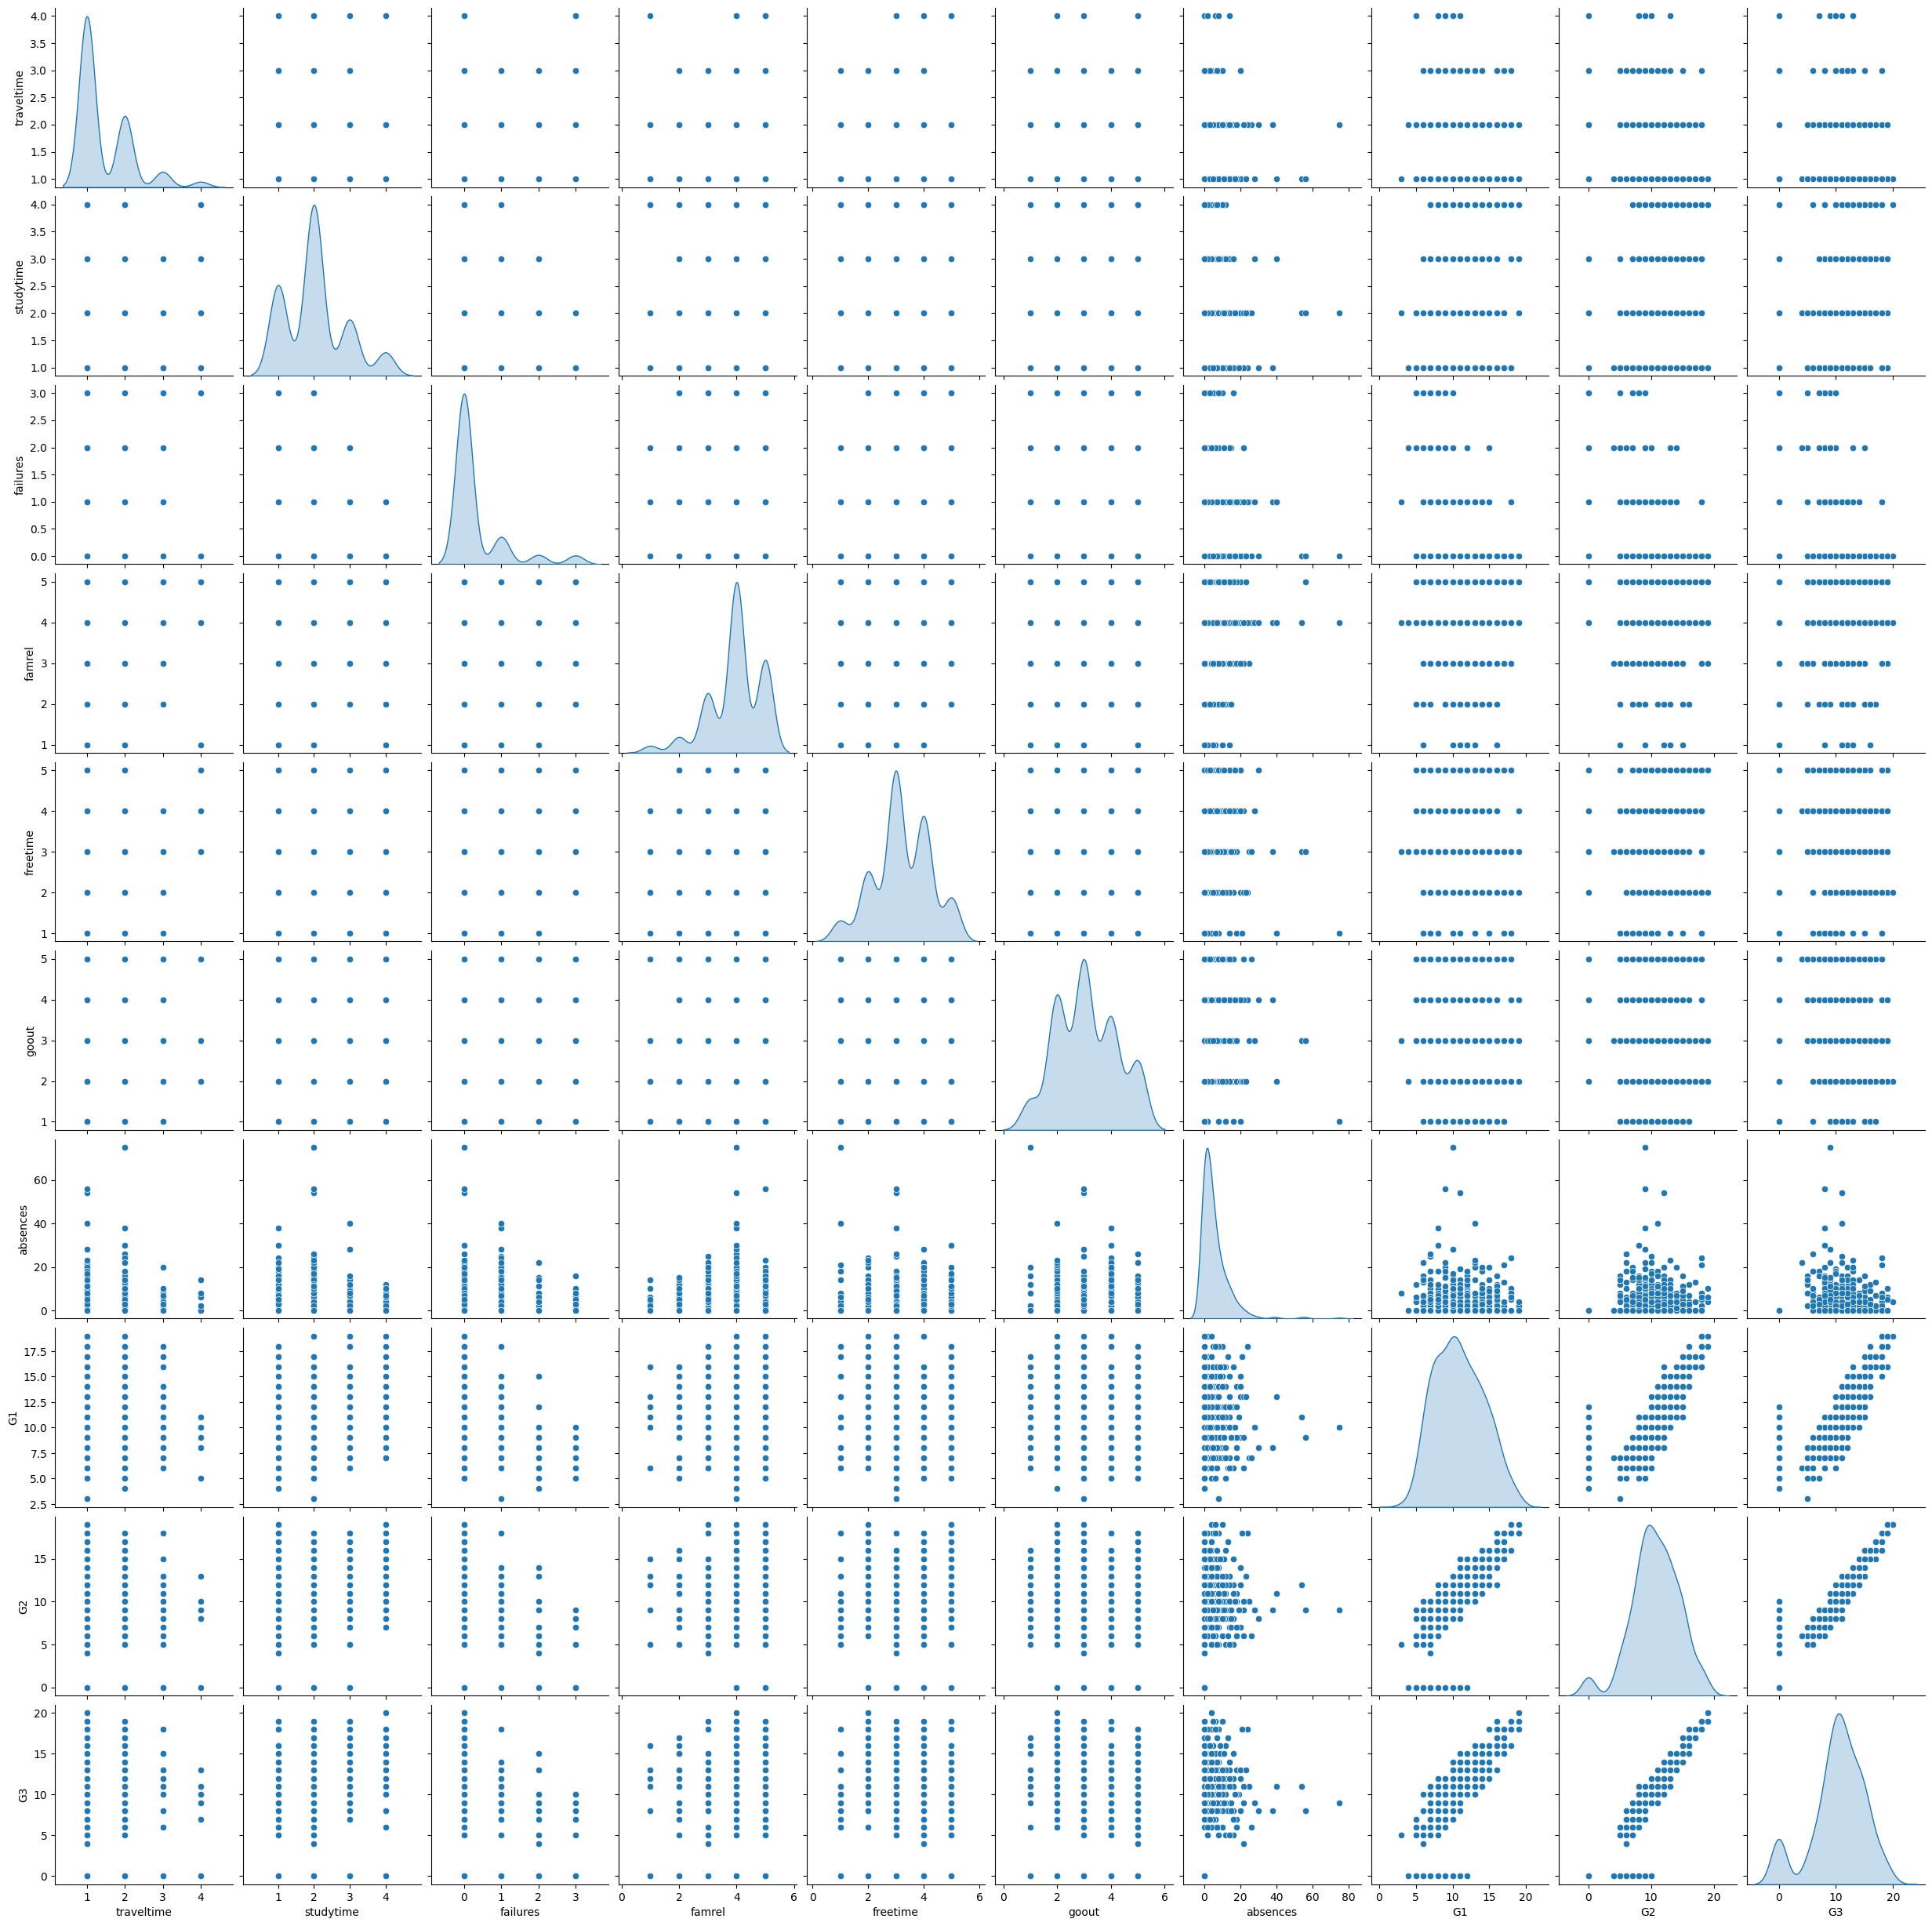

In [ ]:
# Now let's buid a pairplot for every int var

selected_vars = ["traveltime", "studytime", "failures","famrel","freetime","goout","absences","G1","G2","G3"]
sns.pairplot(df[selected_vars], diag_kind='kde', markers=["o", "s", "D"])


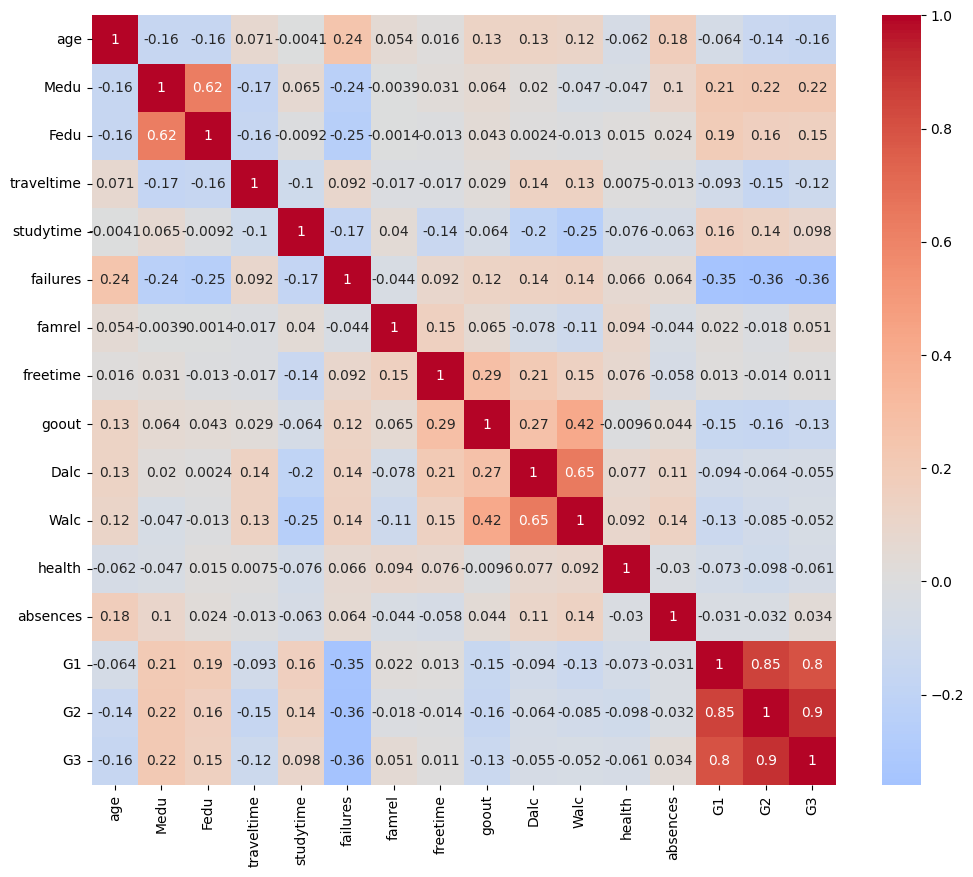

In [ ]:
#Correlation Matrix
num_vars = [cols for cols in df.columns if df[cols].dtype =='int64']
num_vars
cor_matrix = df[num_vars].corr()

fig = plt.figure(figsize = (12,10))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

# Wecan see several interesting correlations:
# Fater and mother education are higly correlated, which shows that romance between peasant and queen are bedtime stories
# We also see that there is a little correlation with father/mother education with G3 G2 G1, which maks sense
# A quite strong negative relationship between G3 G2 G1 and family relationships (and failures as well), which also mkes sense





<ipython-input-10-3bce1eb6844f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette = 'viridis')
<ipython-input-10-3bce1eb6844f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette = 'viridis')
<ipython-input-10-3bce1eb6844f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette = 'viridis')
<ipython-input-10-3bce1eb6844f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

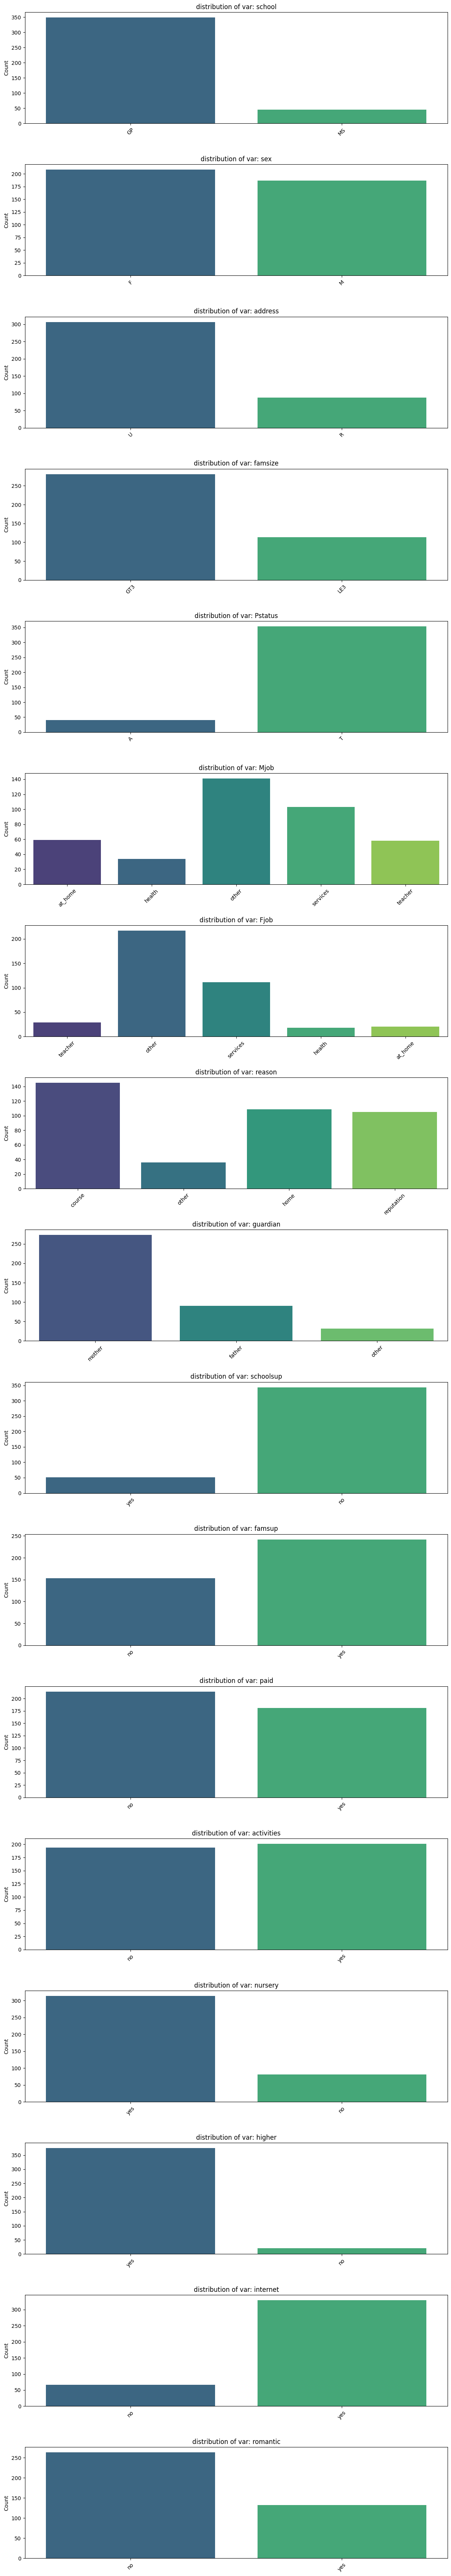

In [ ]:
# Categorical variable analysis

cat_vars = [col for col in df.columns if df[col].dtype == 'object']
cat_vars

fig, axes = plt.subplots(len(cat_vars),1 , figsize= (12,len(cat_vars) * 4))
#fig (Figure) => C'est l'objet principal qui contient l’ensemble des sous-graphiques.
#axes (Axes)  => Ce sont les sous-graphiques individuels où les tracés sont affichés.
for i, col in enumerate(cat_vars): #enumerate output = index, value
  sns.countplot(x=df[col], ax=axes[i], palette = 'viridis')
  axes[i].set_title(f'distribution of var: {col}')
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Count")
  axes[i].tick_params(axis='x', rotation=45)  # Rotation pour lisibilité

plt.tight_layout() #ajuste automatiquement l'espacement entre les sous-graphiques pour éviter qu'ils se chevauchent.
plt.show()




<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


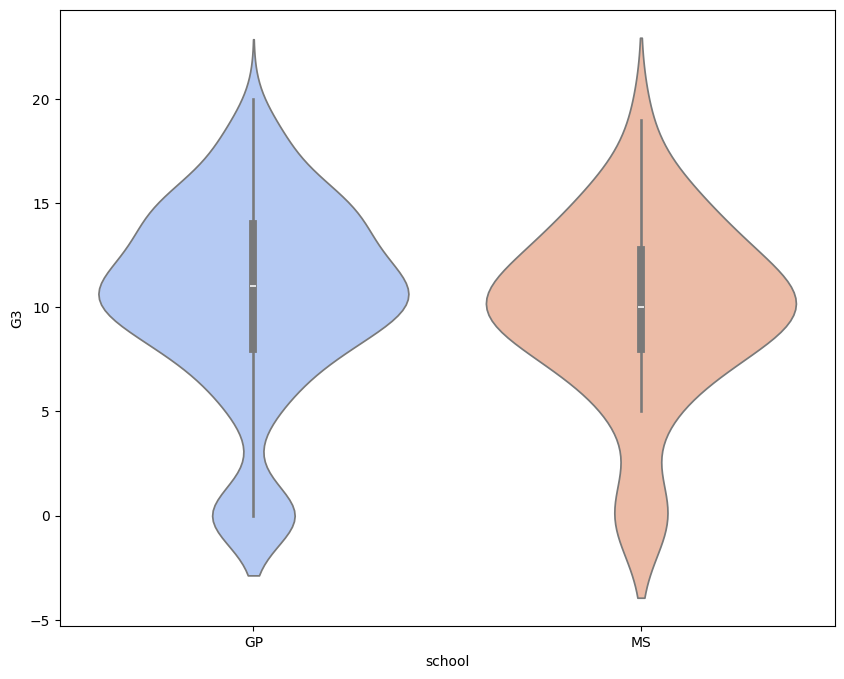

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


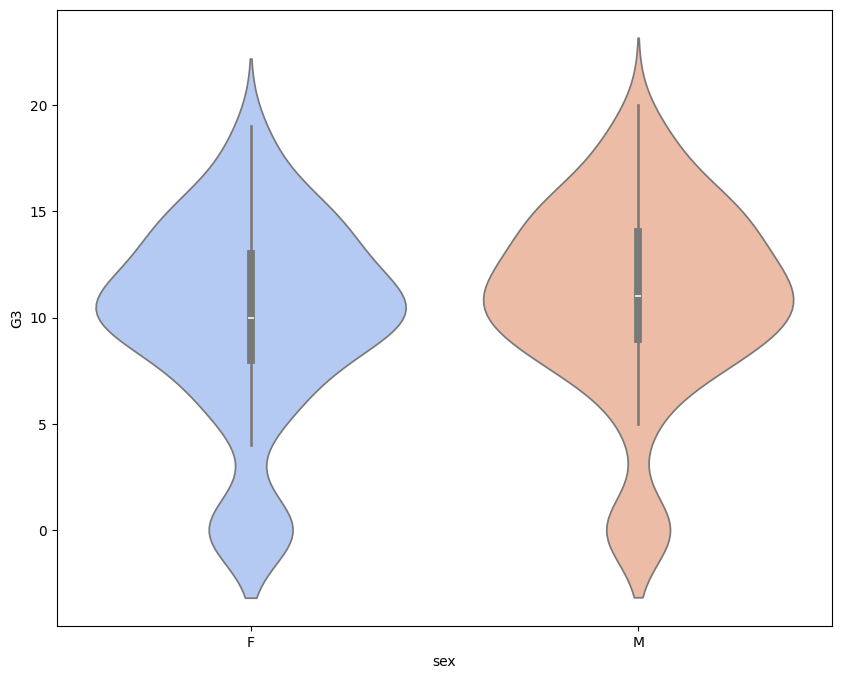

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


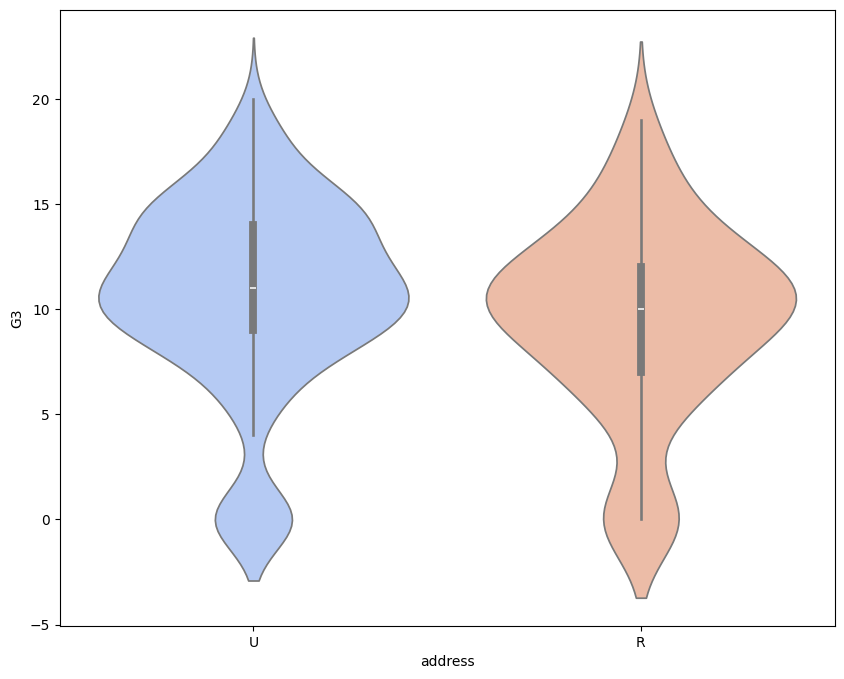

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


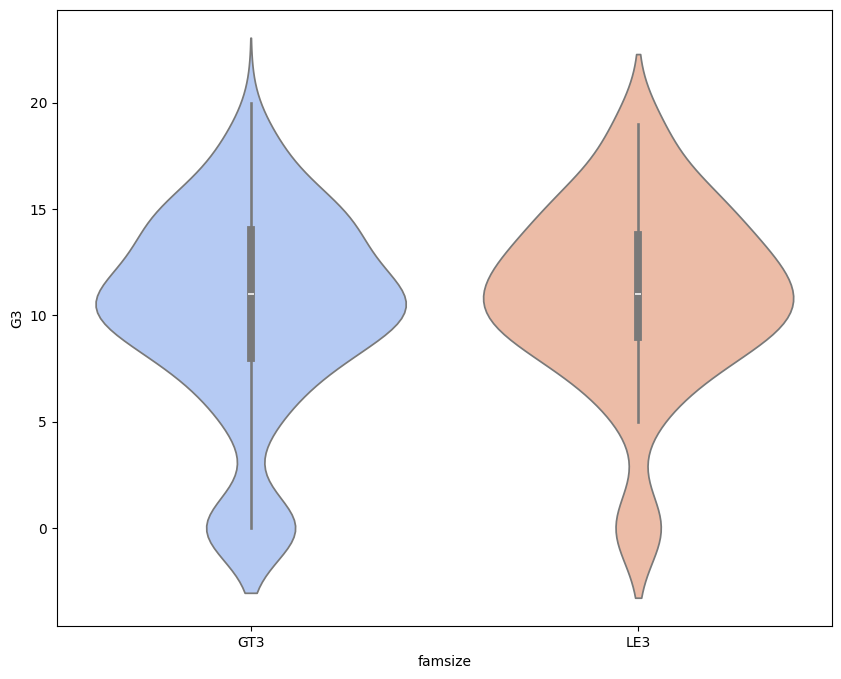

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


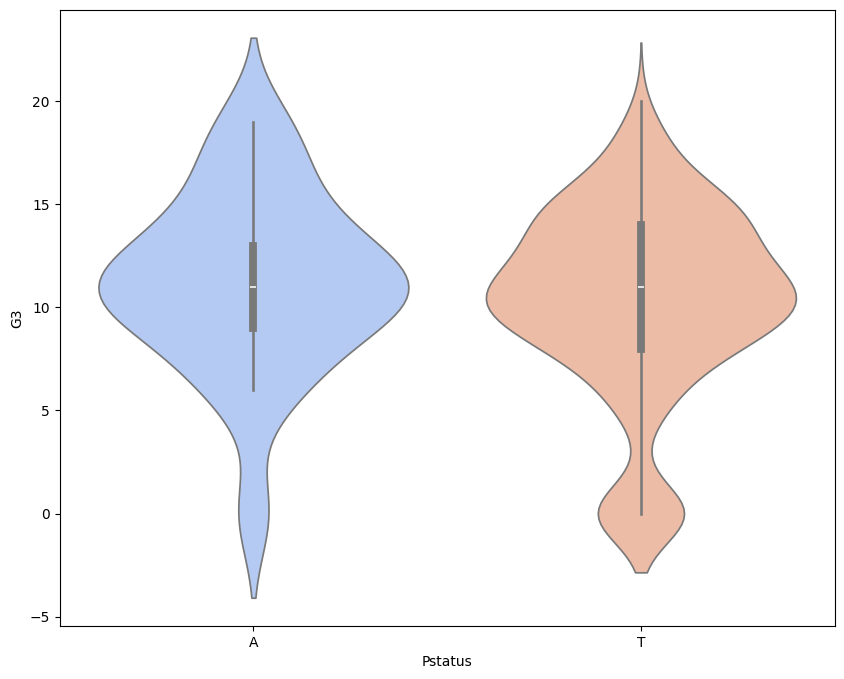

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


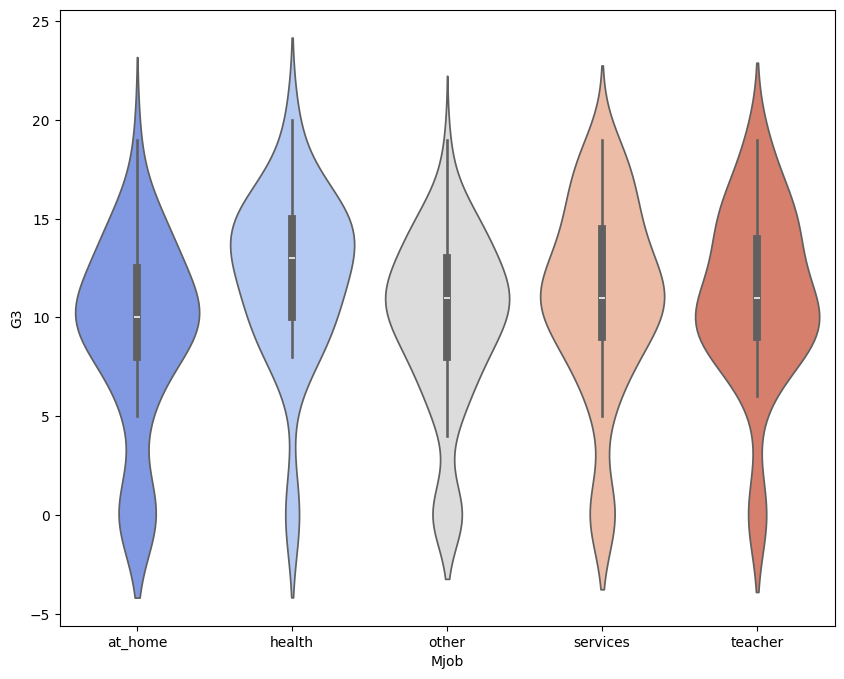

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


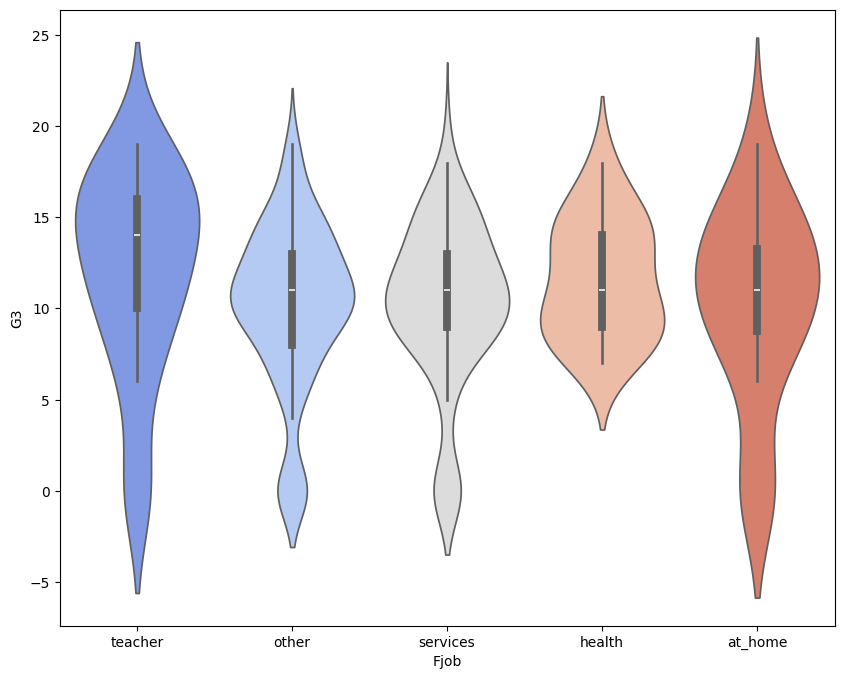

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


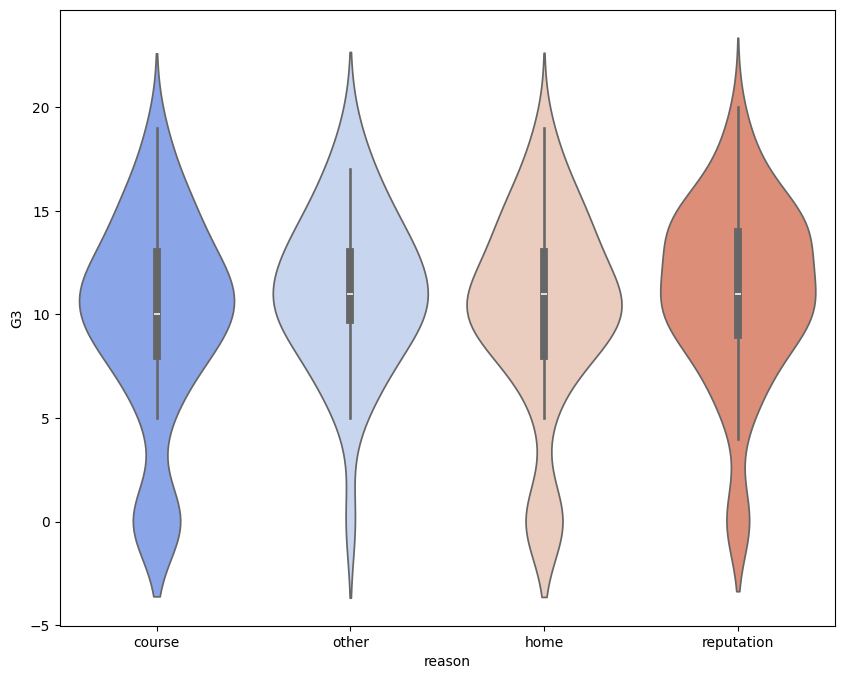

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


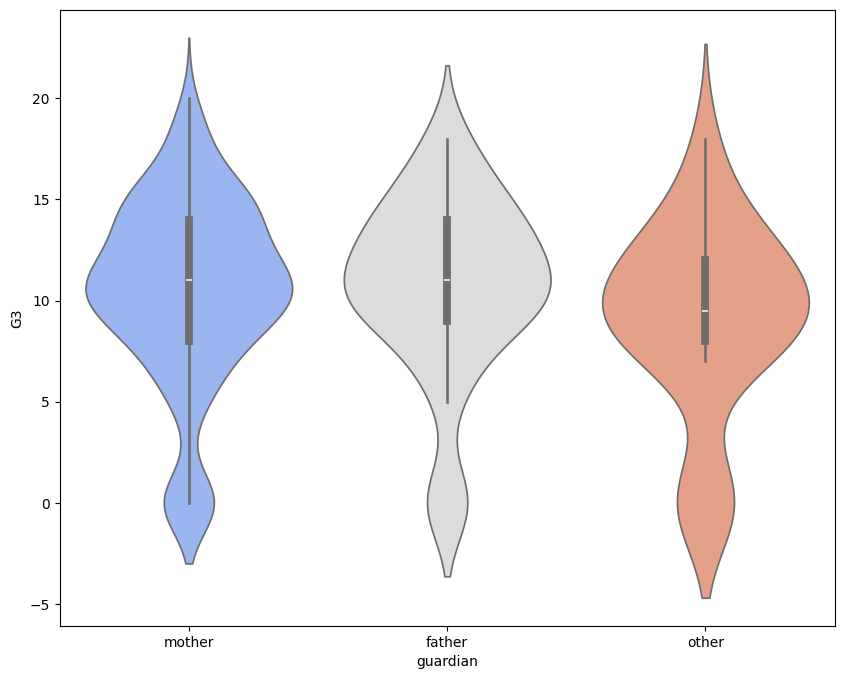

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


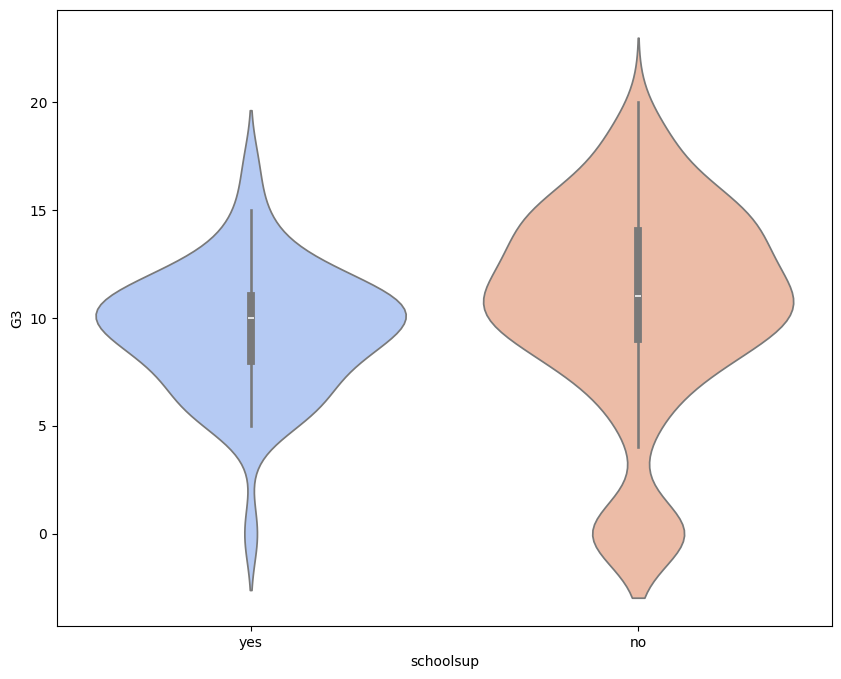

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


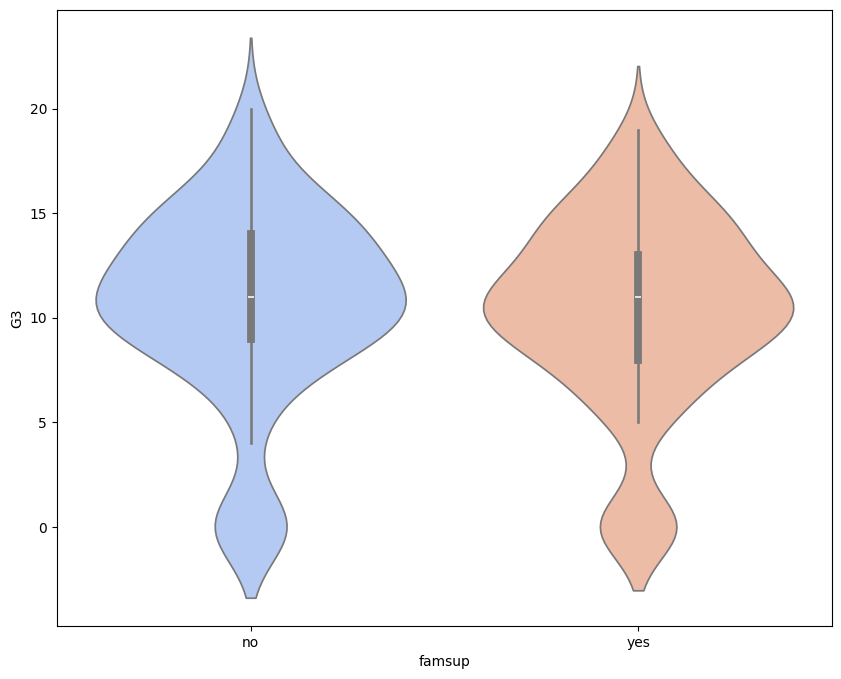

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


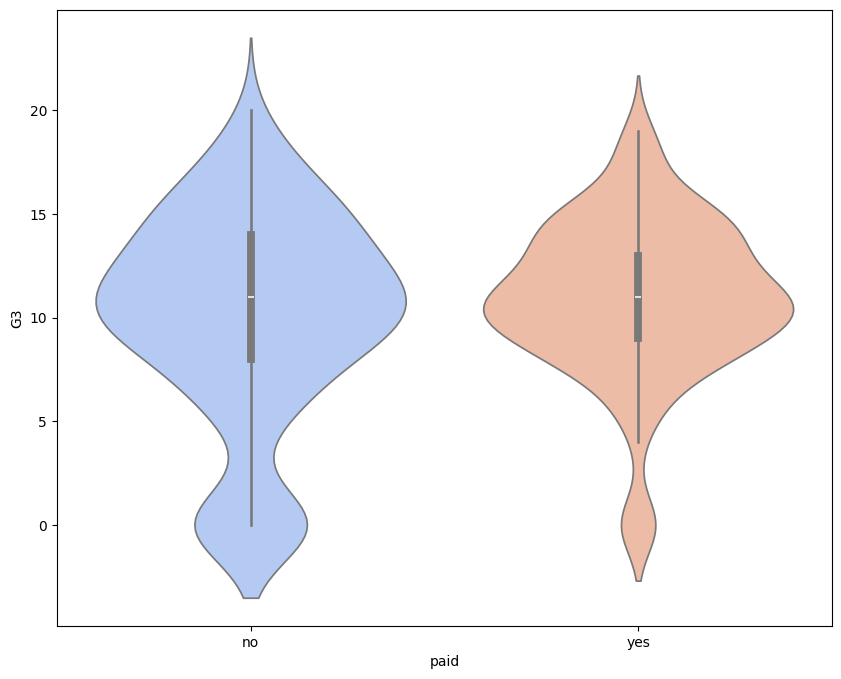

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


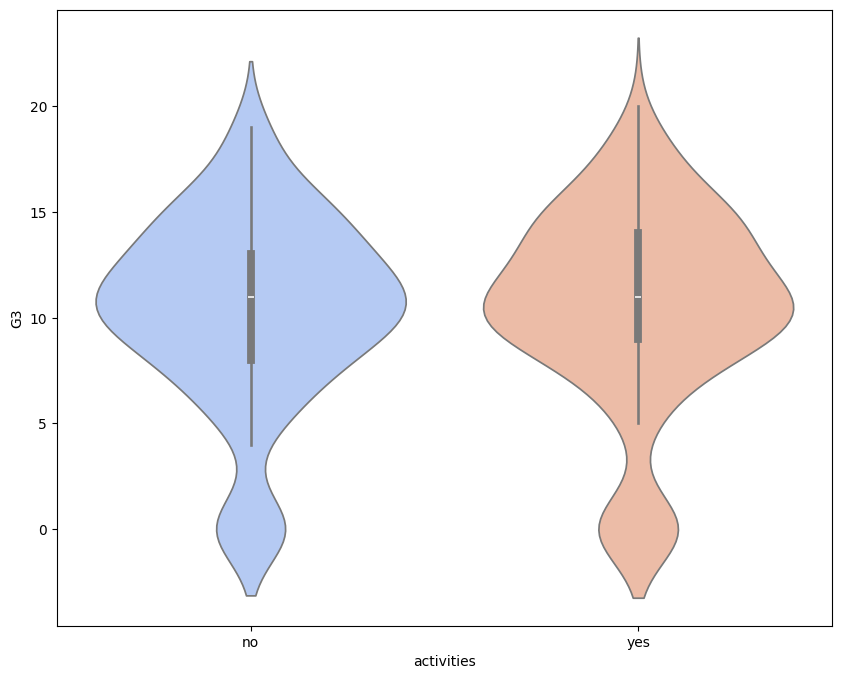

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


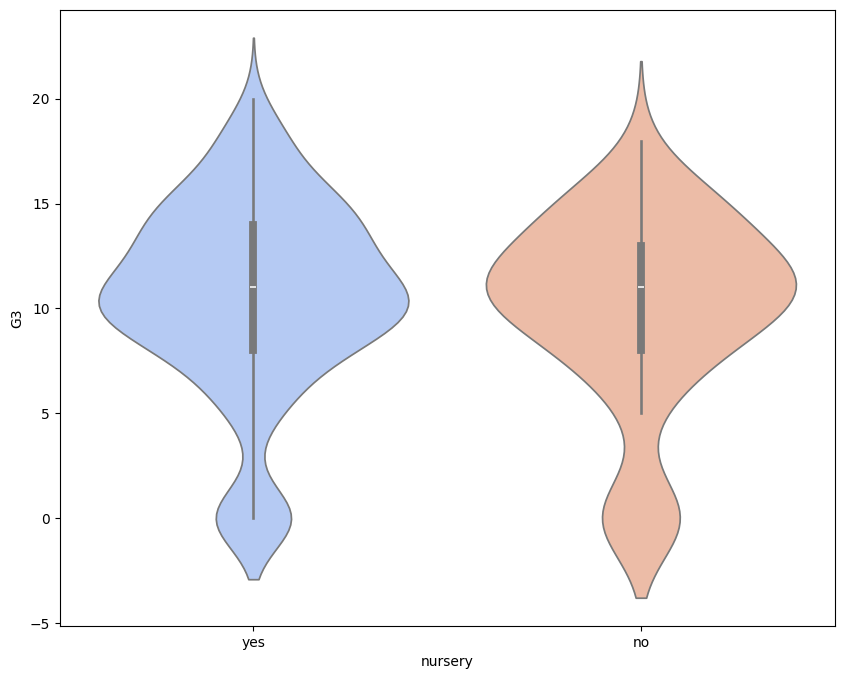

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


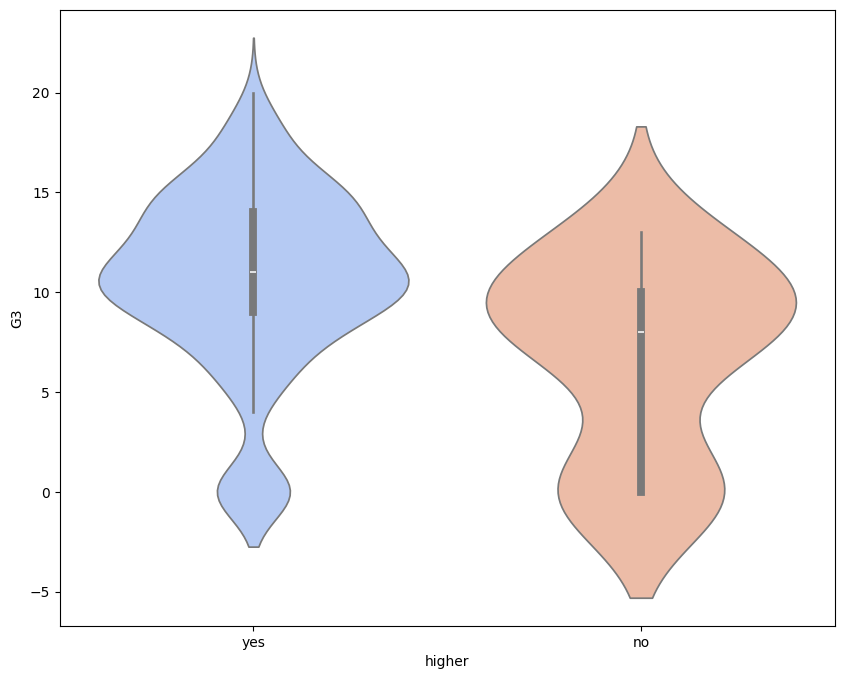

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


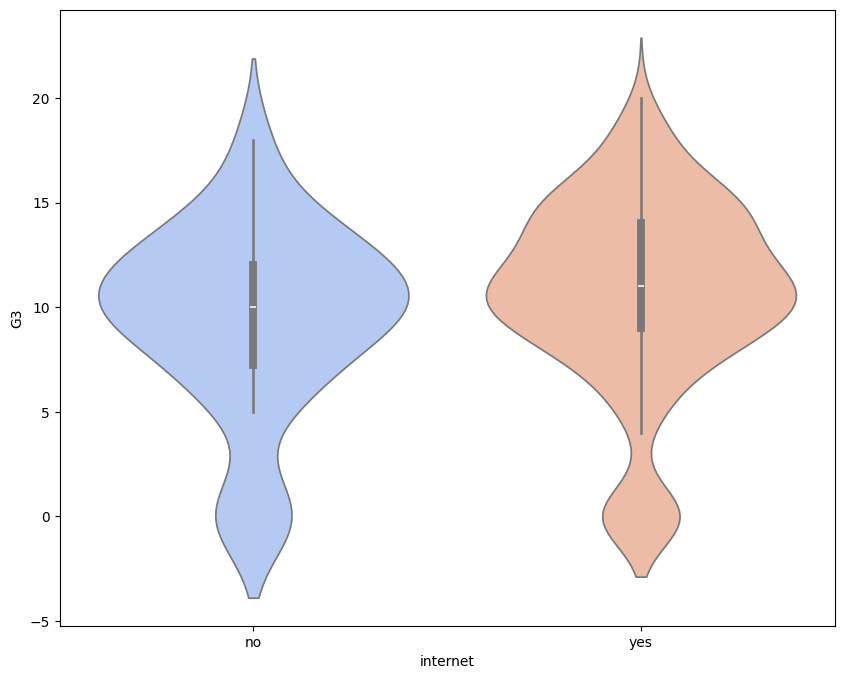

<ipython-input-11-e0aa9d432b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')


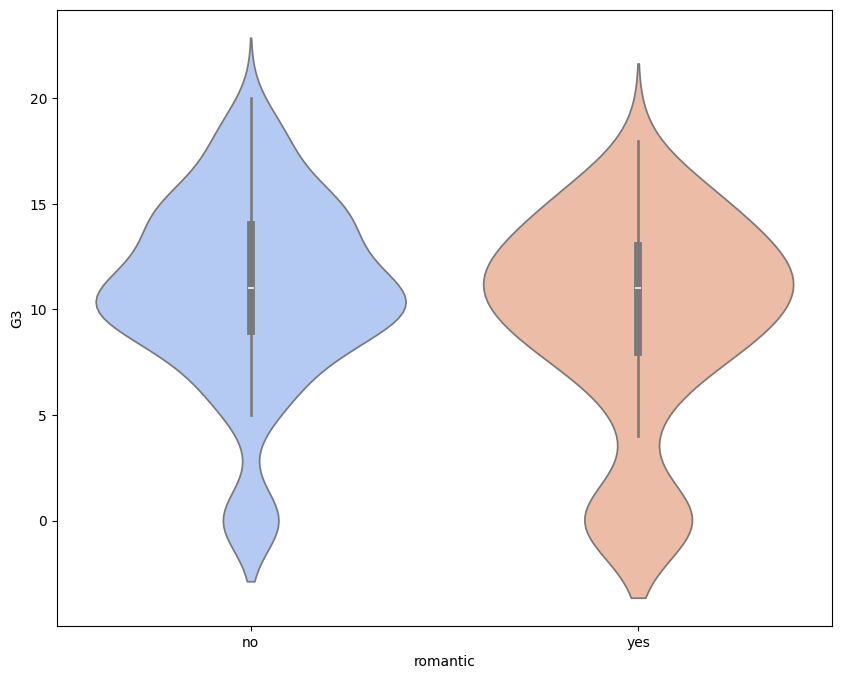

In [ ]:
# boxplot ou violin plot pour observer les différences dans G3 selon chaque catégorie :

for col in cat_vars:
  fig = plt.figure(figsize = (10,8))
  sns.violinplot(x = df[col], y=df["G3"] , palette = 'coolwarm')
  plt.show()

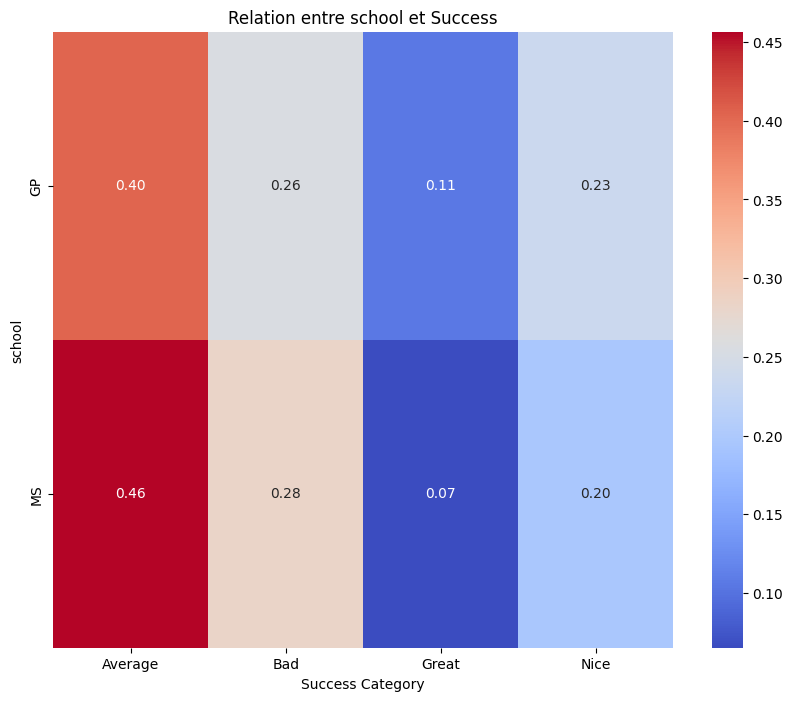

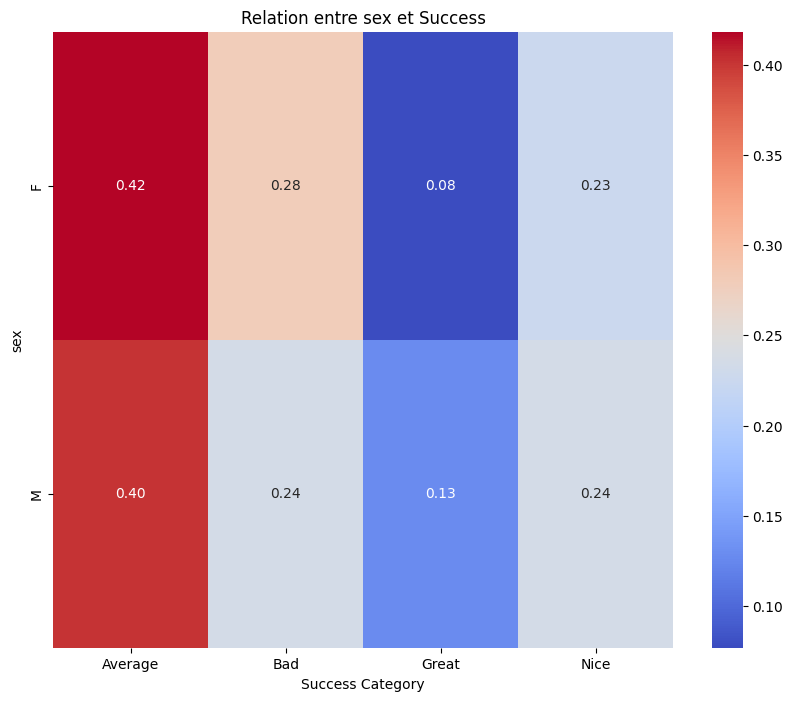

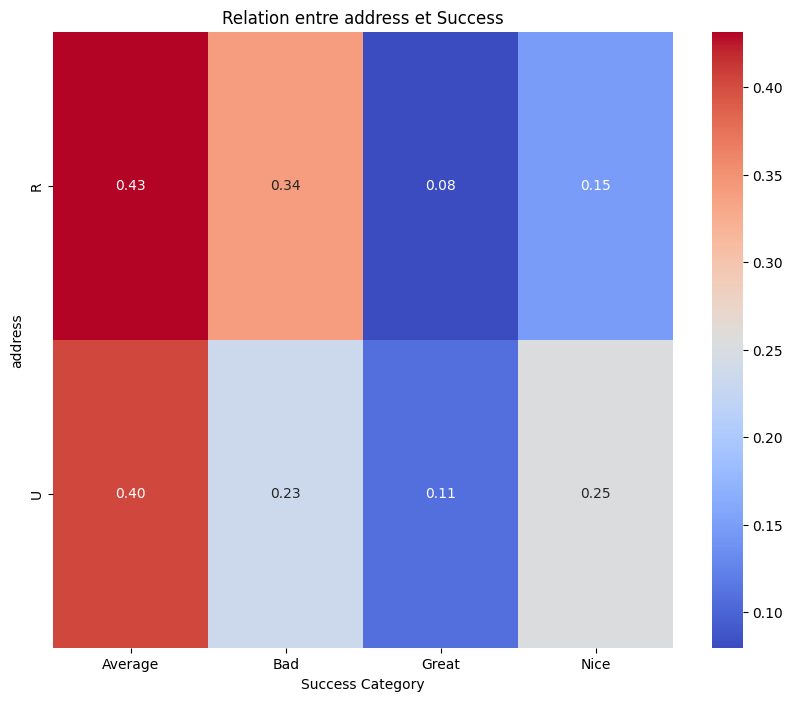

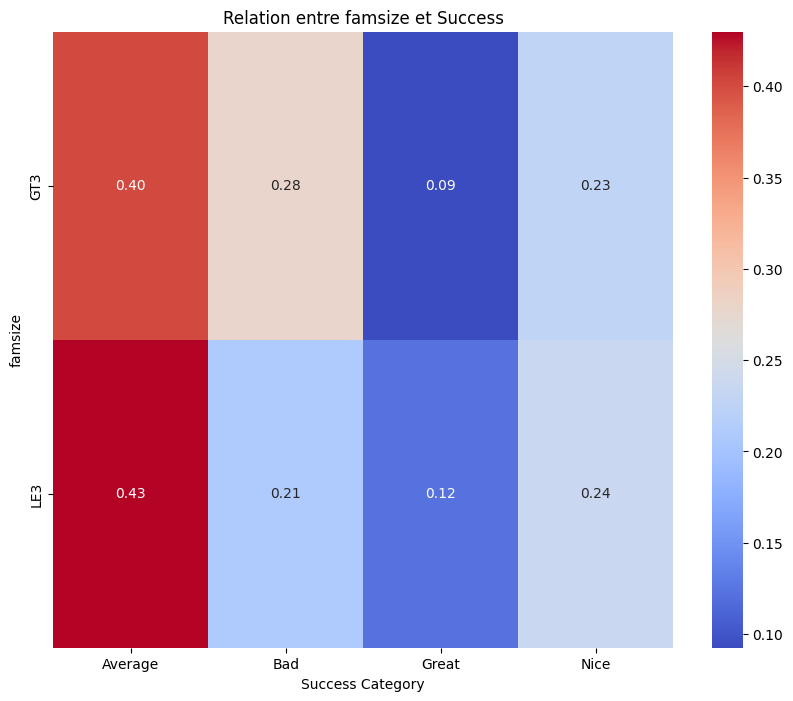

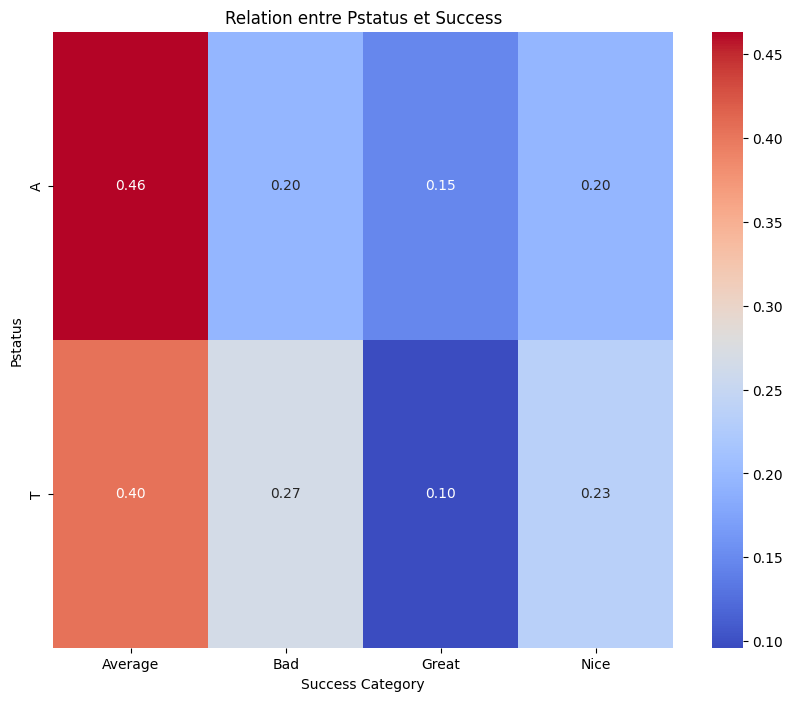

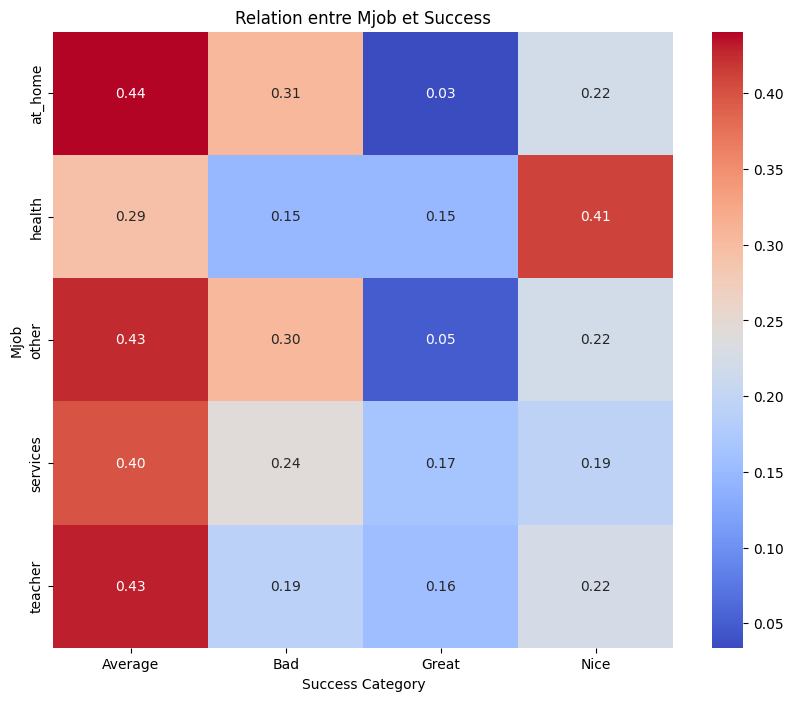

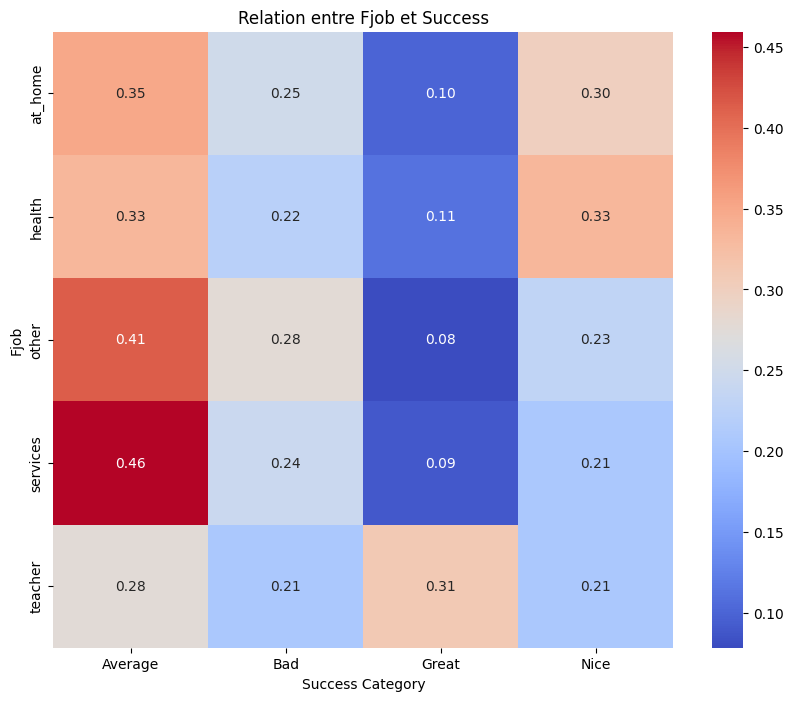

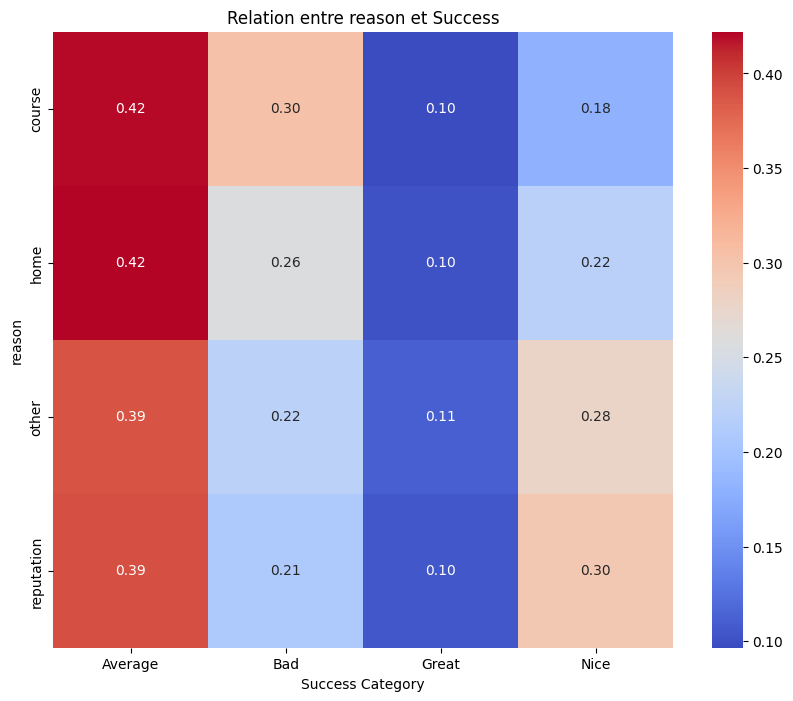

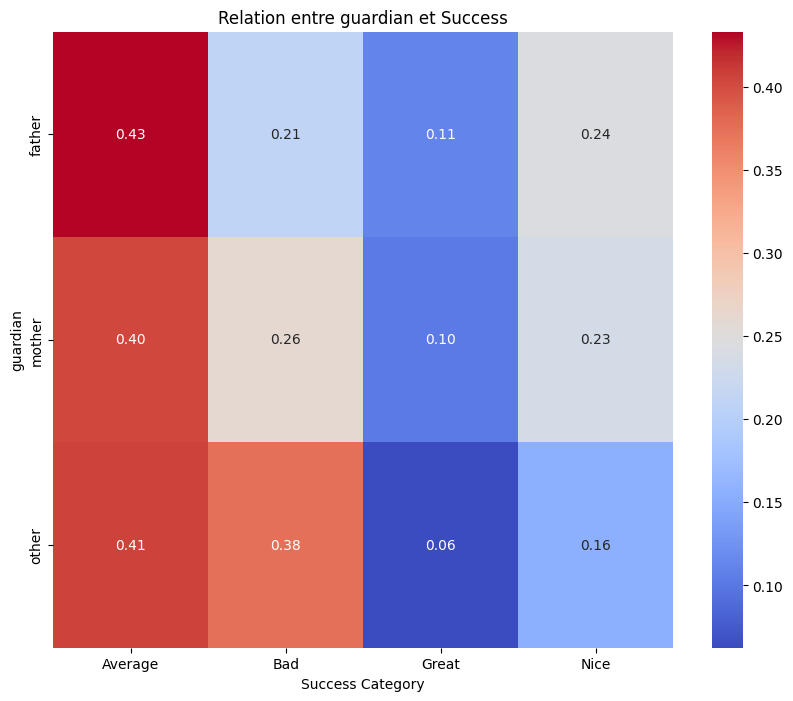

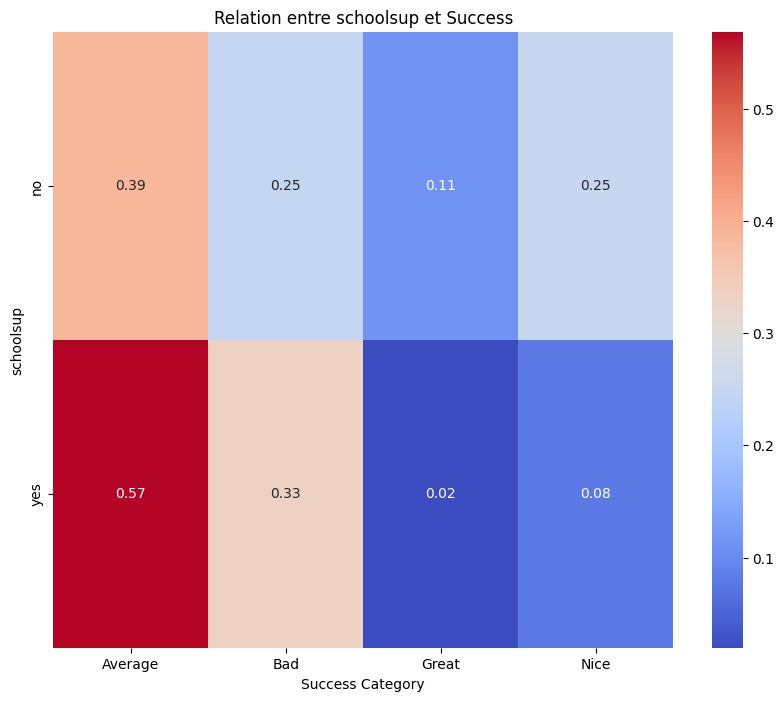

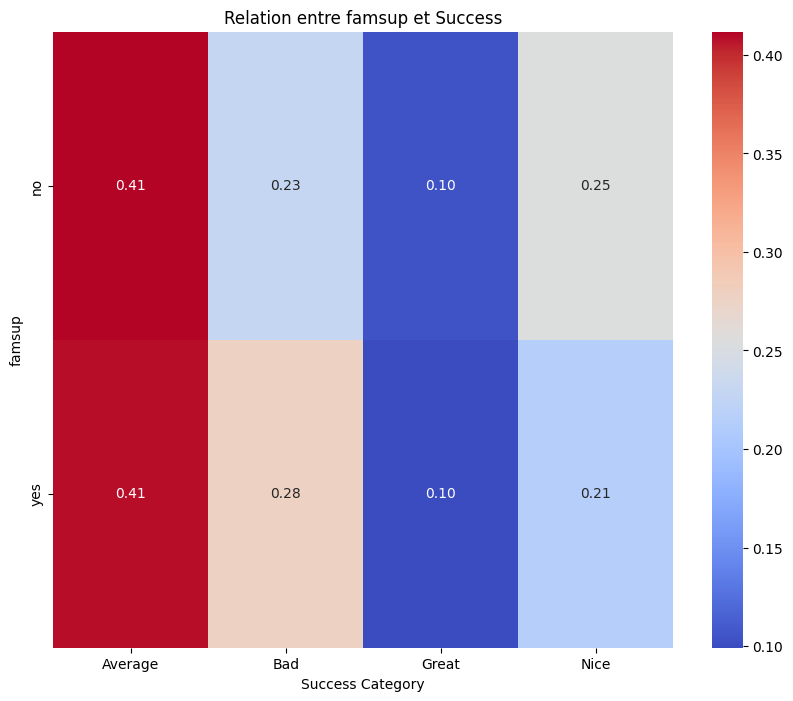

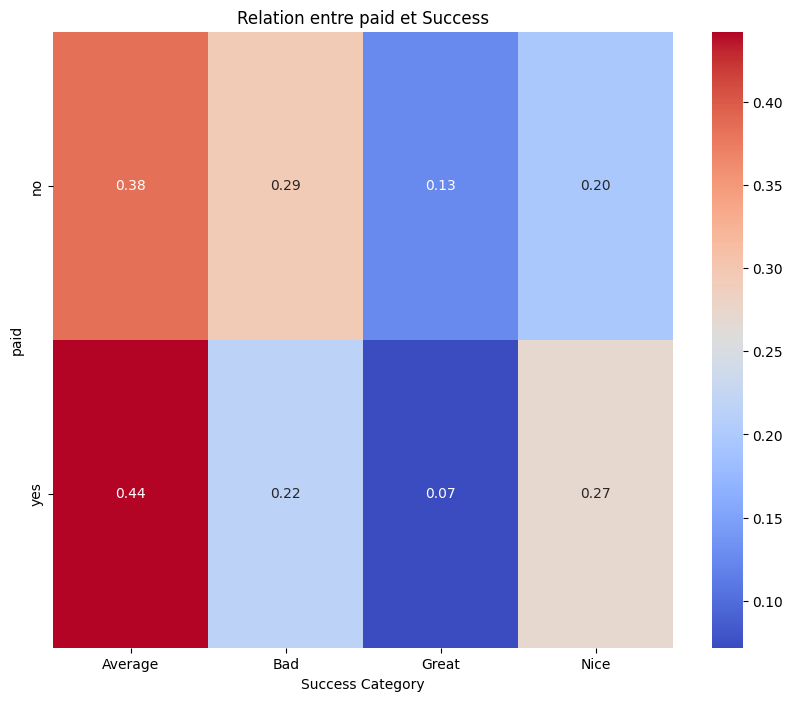

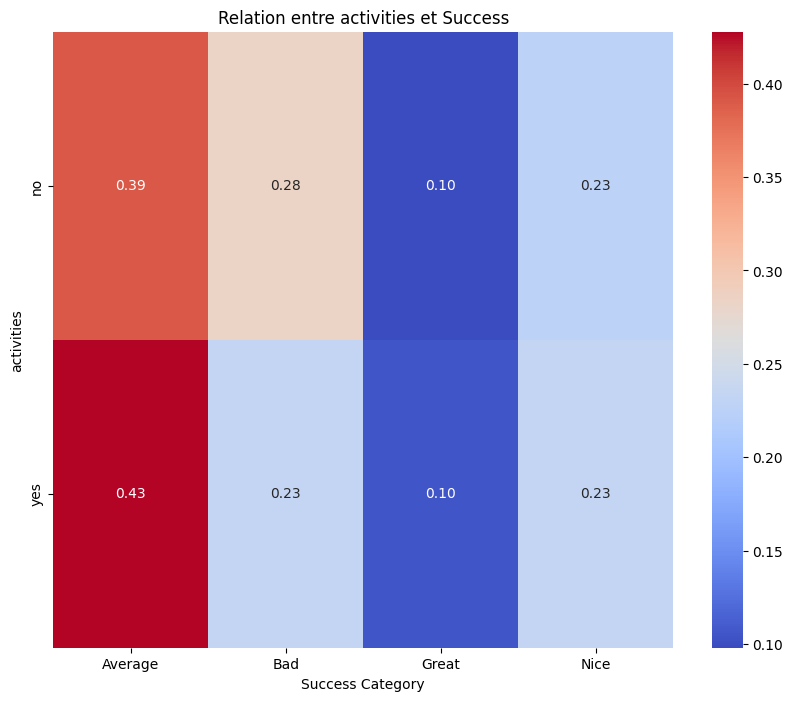

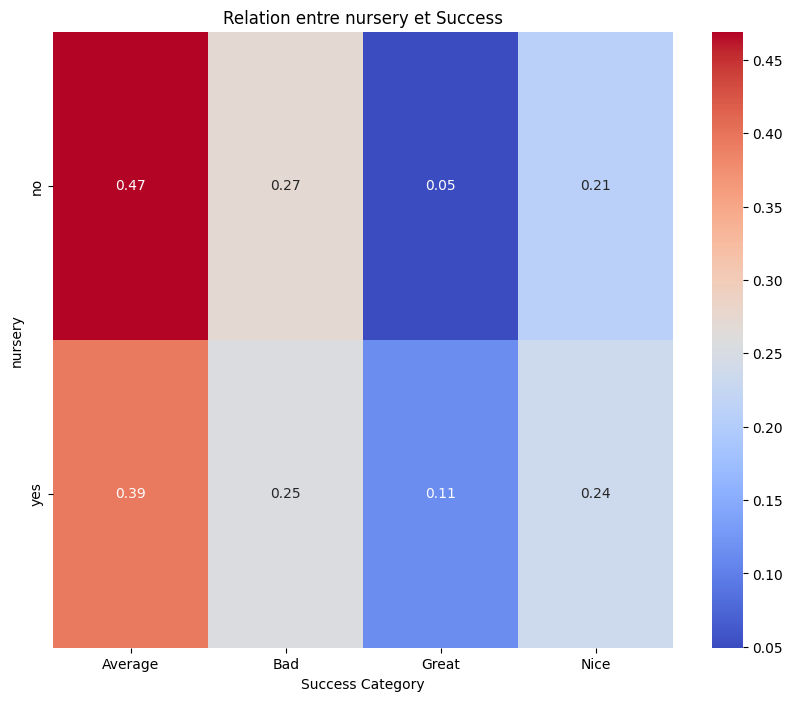

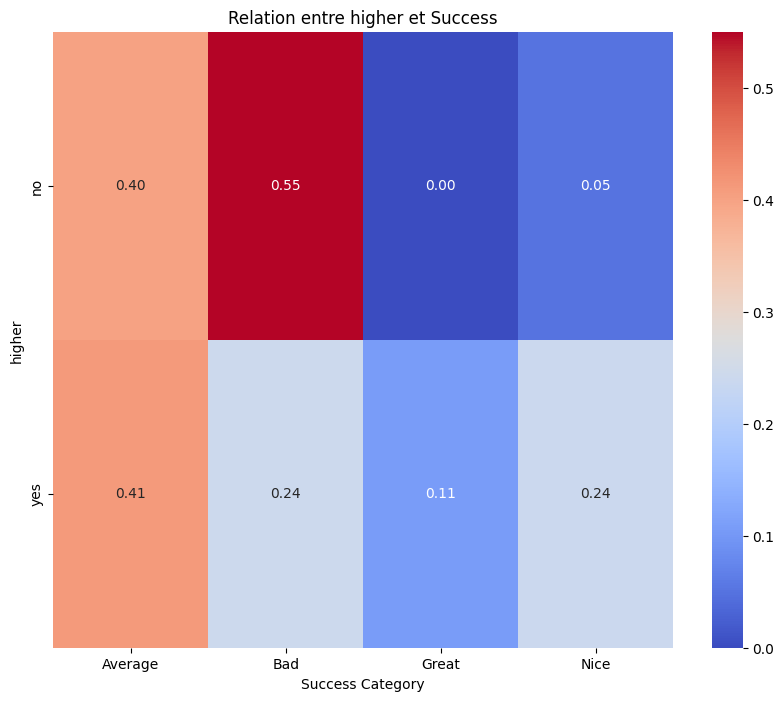

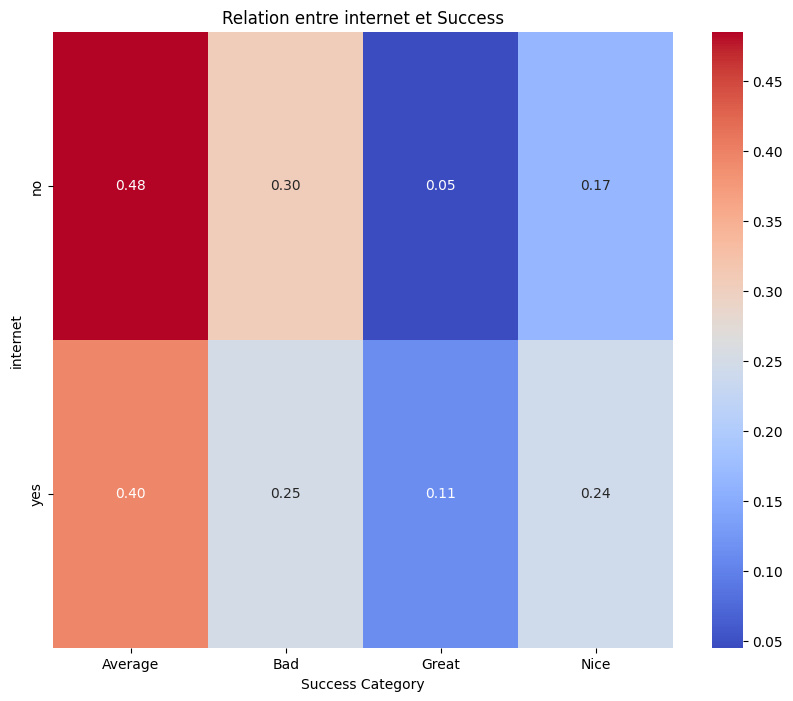

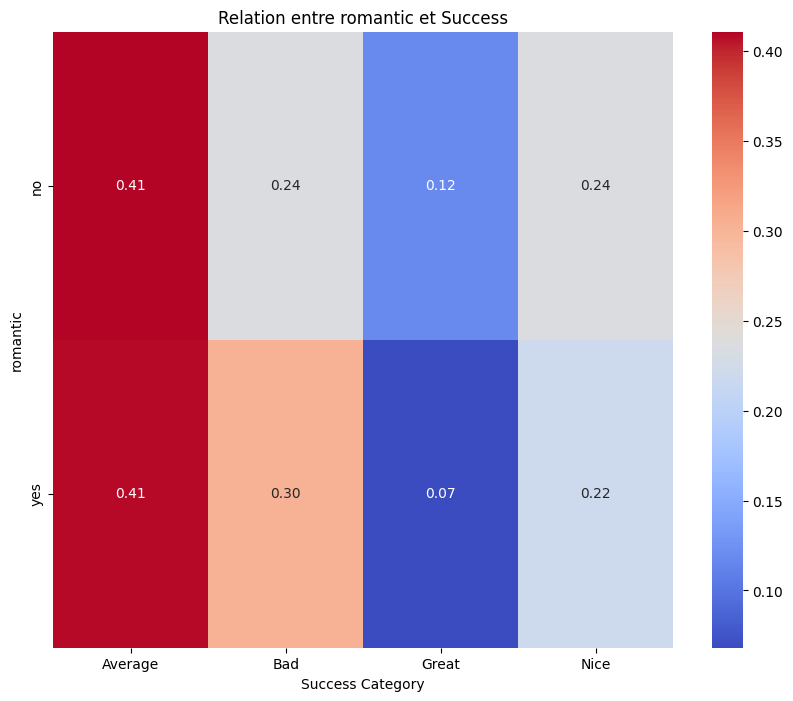

In [ ]:
# Create a categroical variable based on G3
df["success"] = df["G3"].apply(lambda x: "Great" if x > 15 else "Nice" if x <= 15 and x > 12 else "Average" if x <= 12 and x > 8 else "Bad")
df


# use that new varaible to check relationship with other at bariables

for var in cat_vars:
  plt.figure(figsize=(10,8))
  sns.heatmap(pd.crosstab(df[var], df["success"], normalize = 'index'), annot = True ,cmap="coolwarm", fmt=".2f")
  plt.title(f"Relation entre {var} et Success")
  plt.ylabel(var)
  plt.xlabel("Success Category")
  plt.show()
#sns.heatmap(pd.crosstab(df["Medu"], df["success"] , normalize="index"), annot = True)



# we can see one example: for students that have internet they tend to to greater achieve their studies than the ones that don't have internet

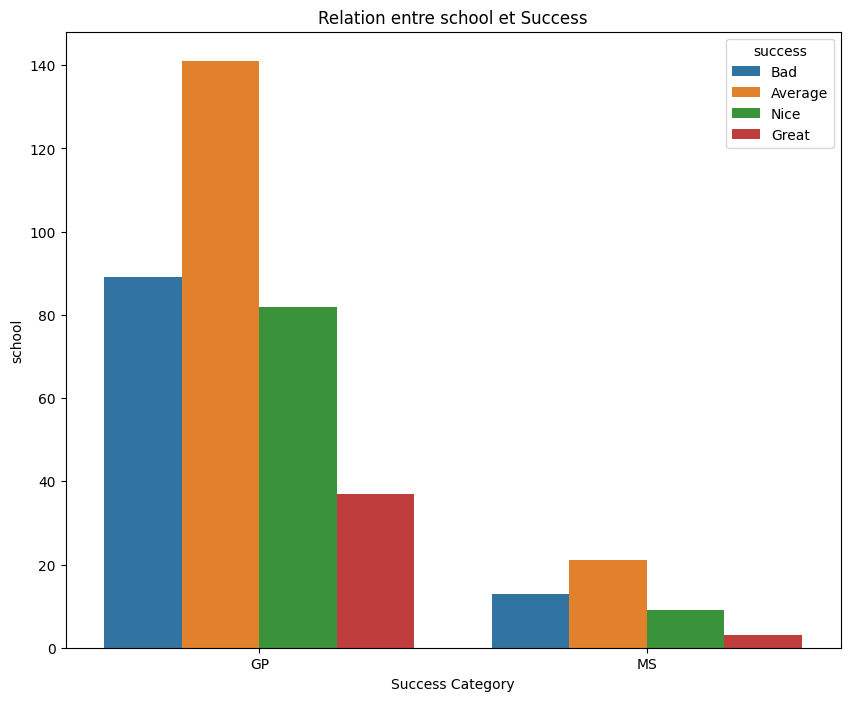

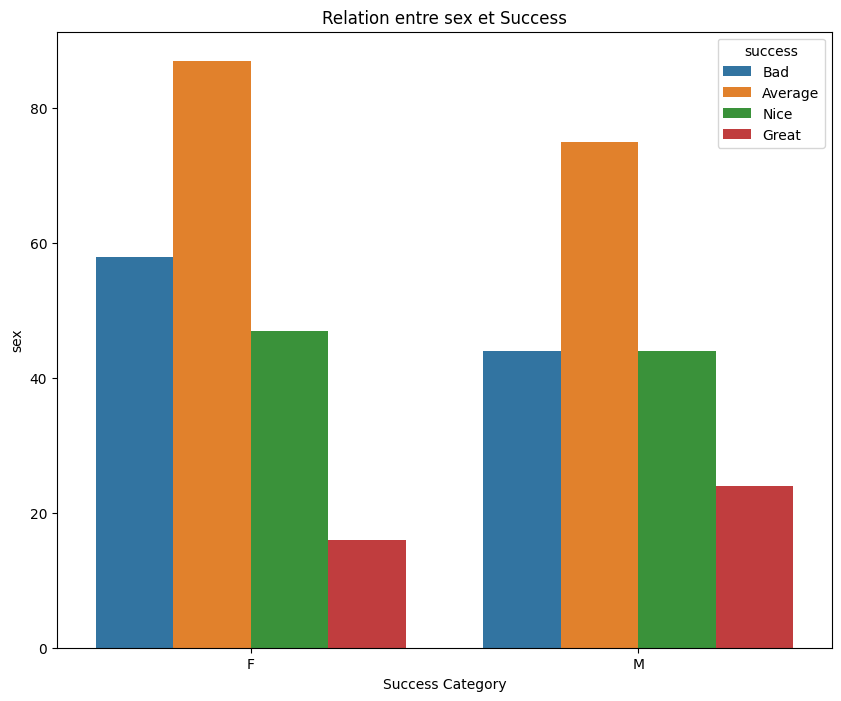

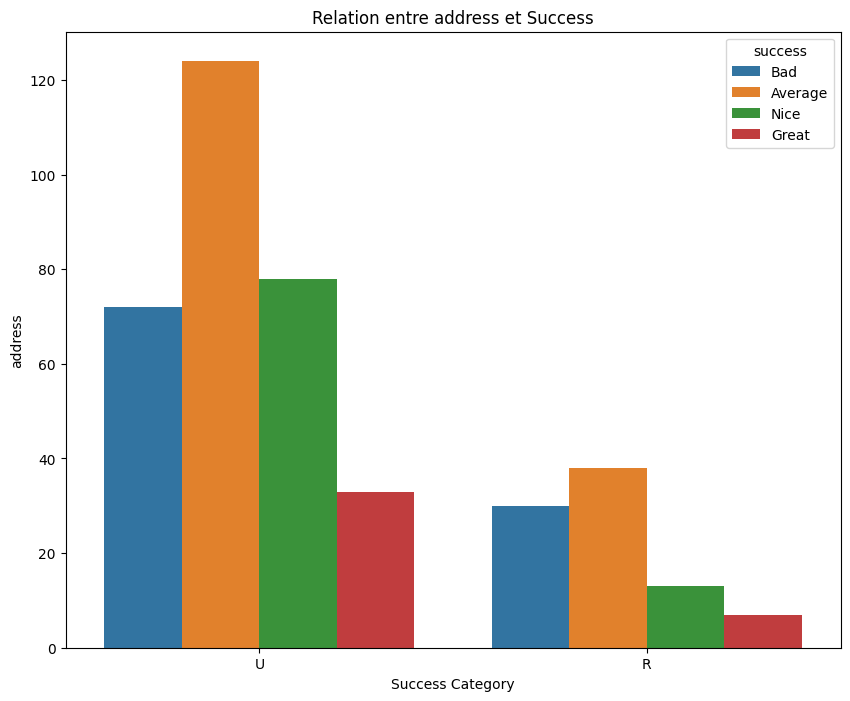

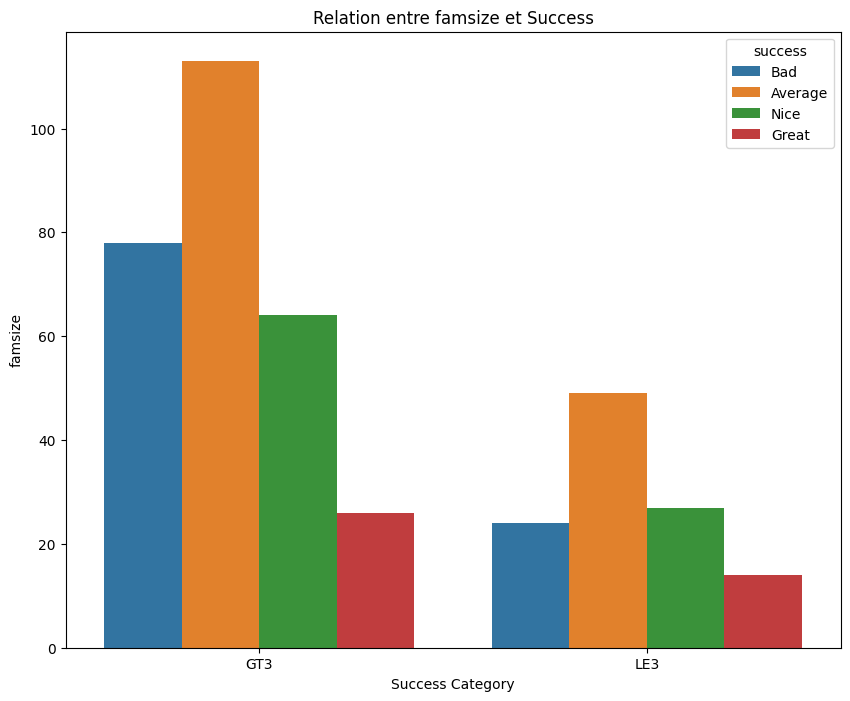

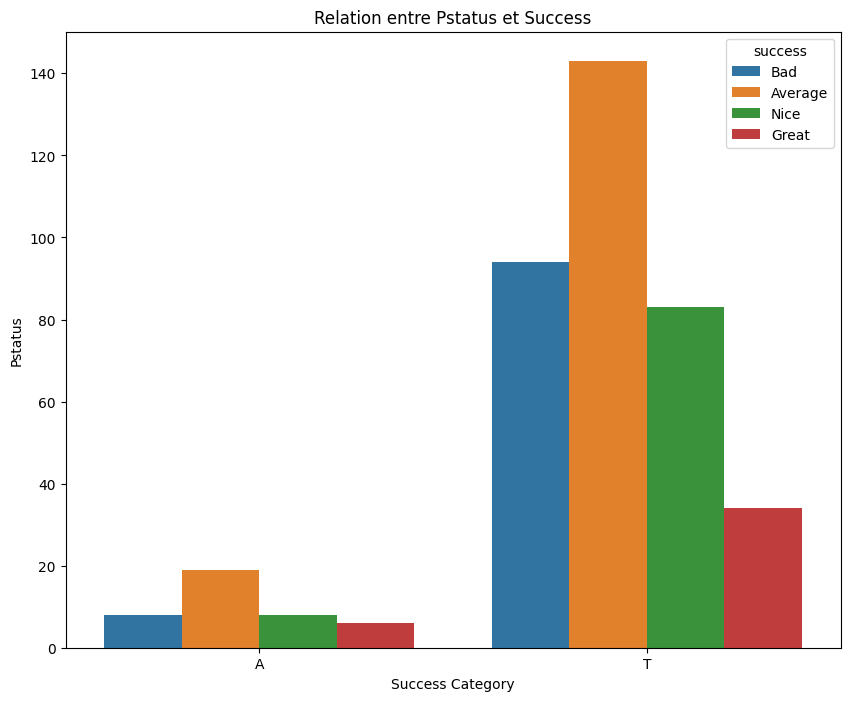

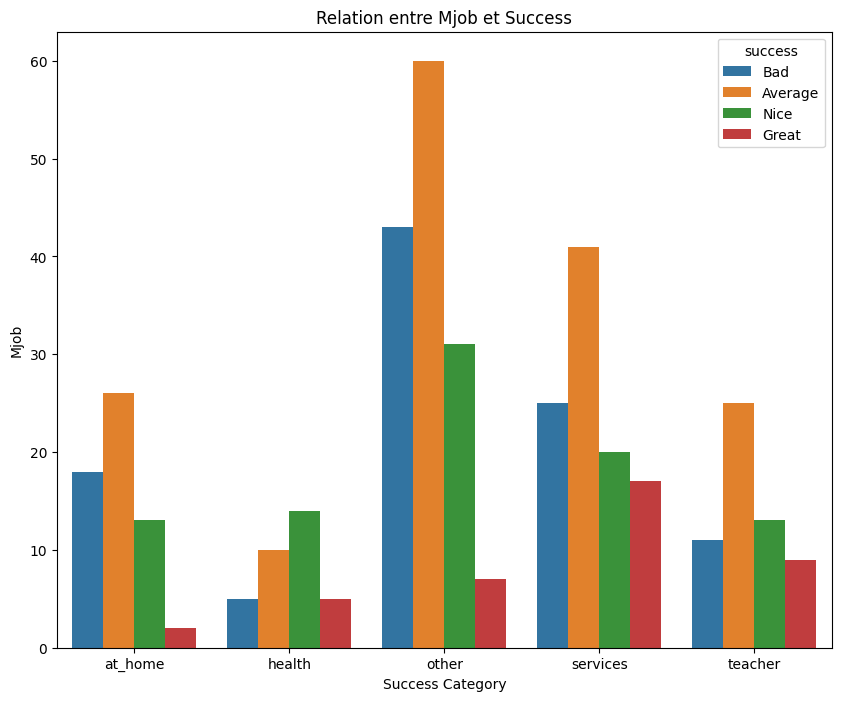

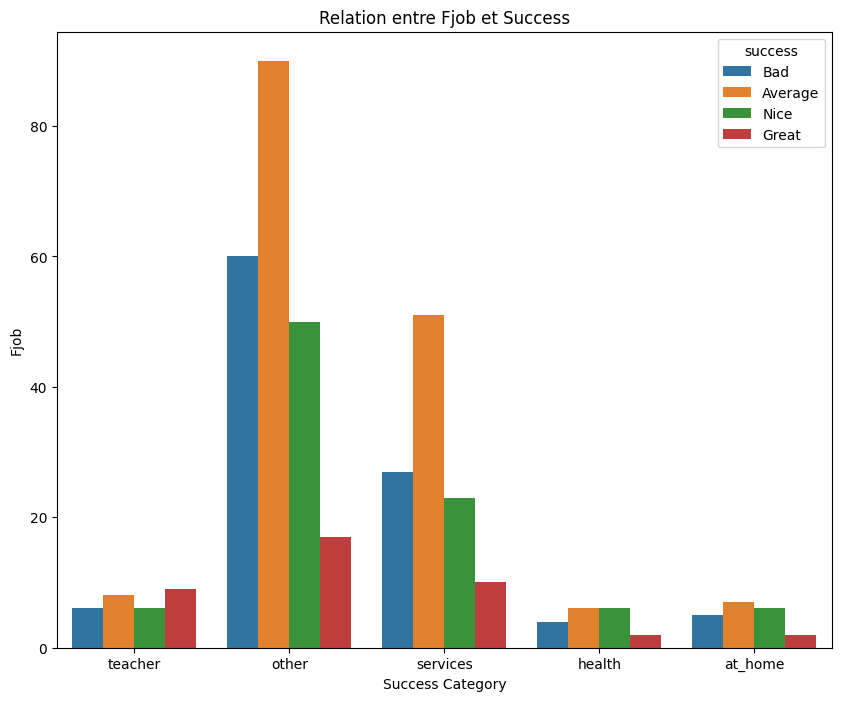

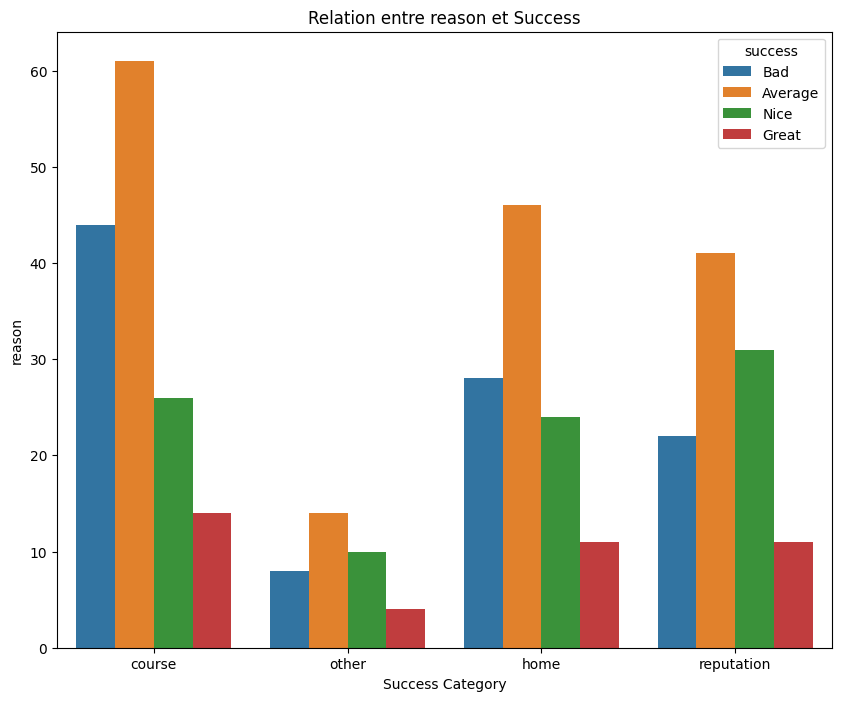

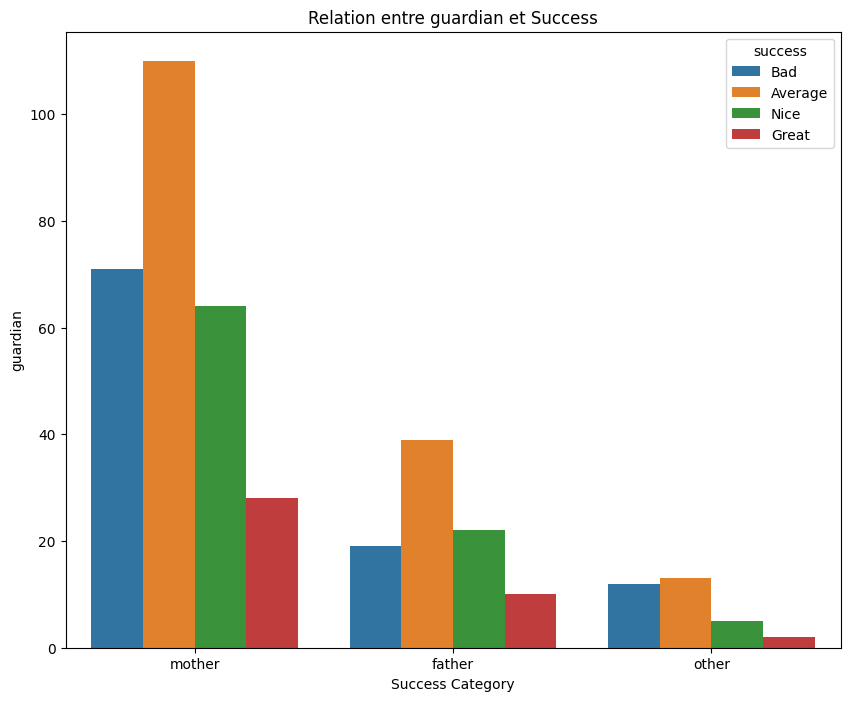

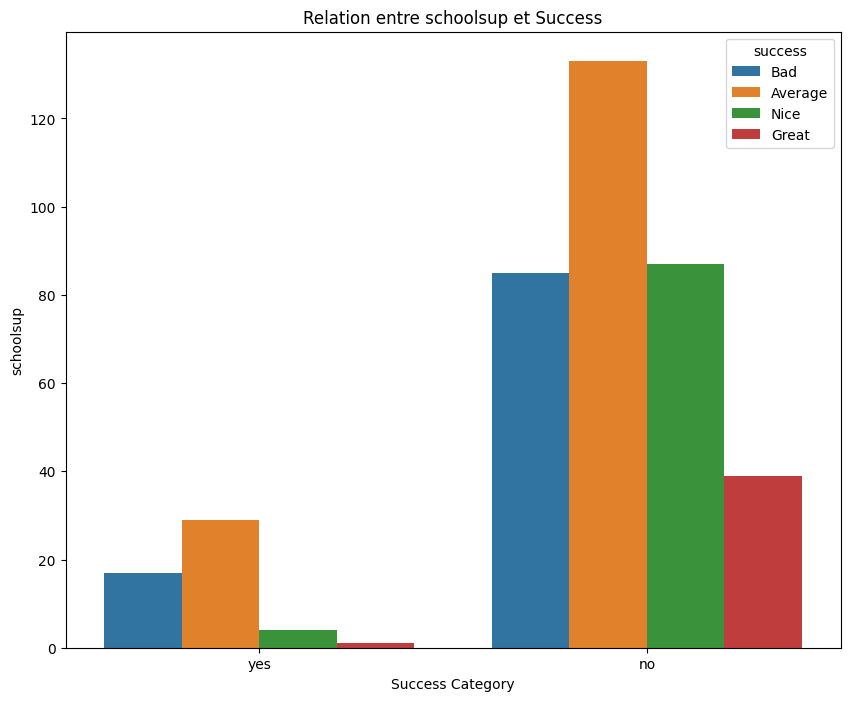

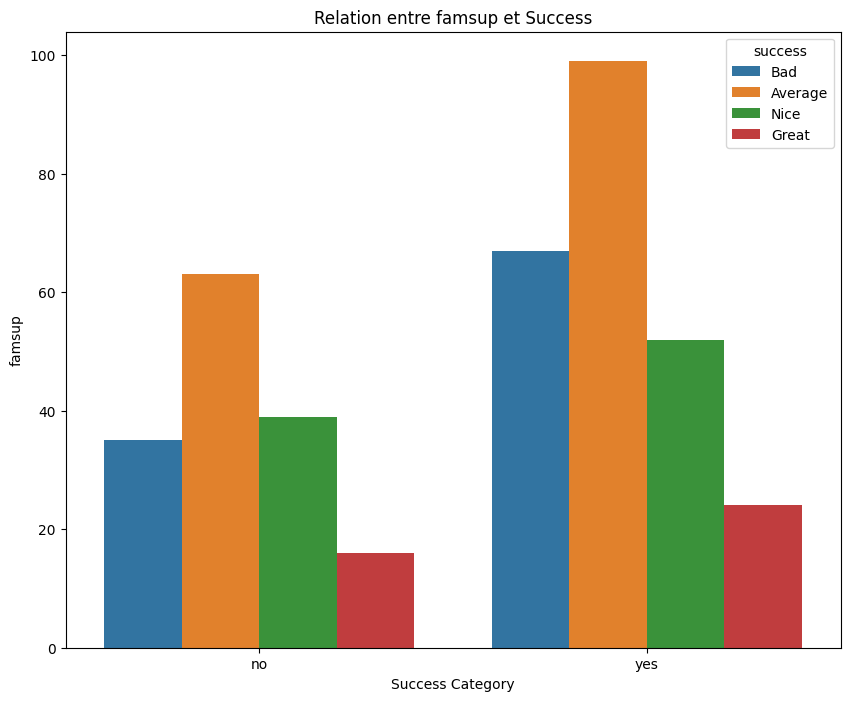

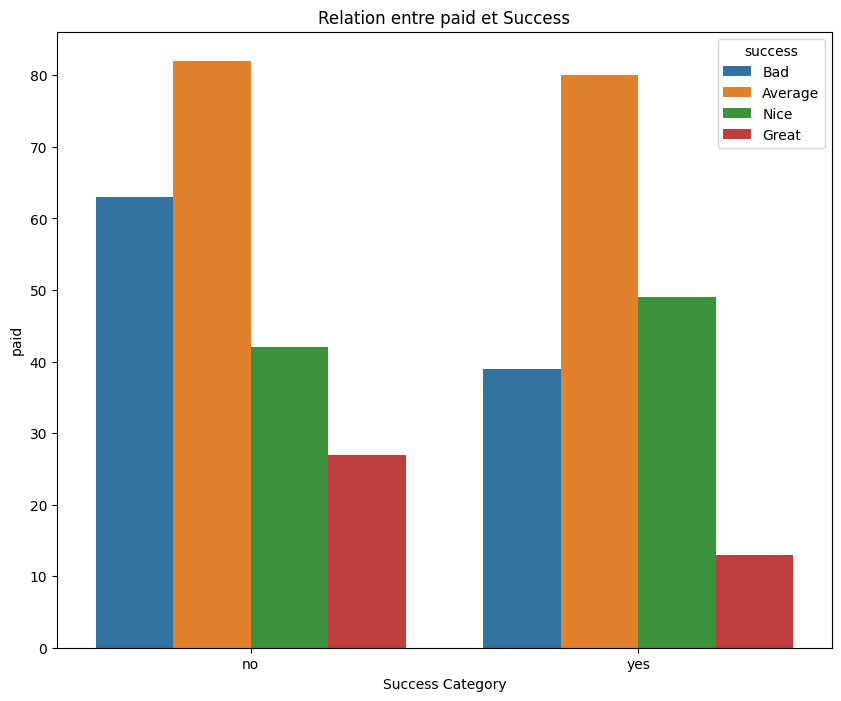

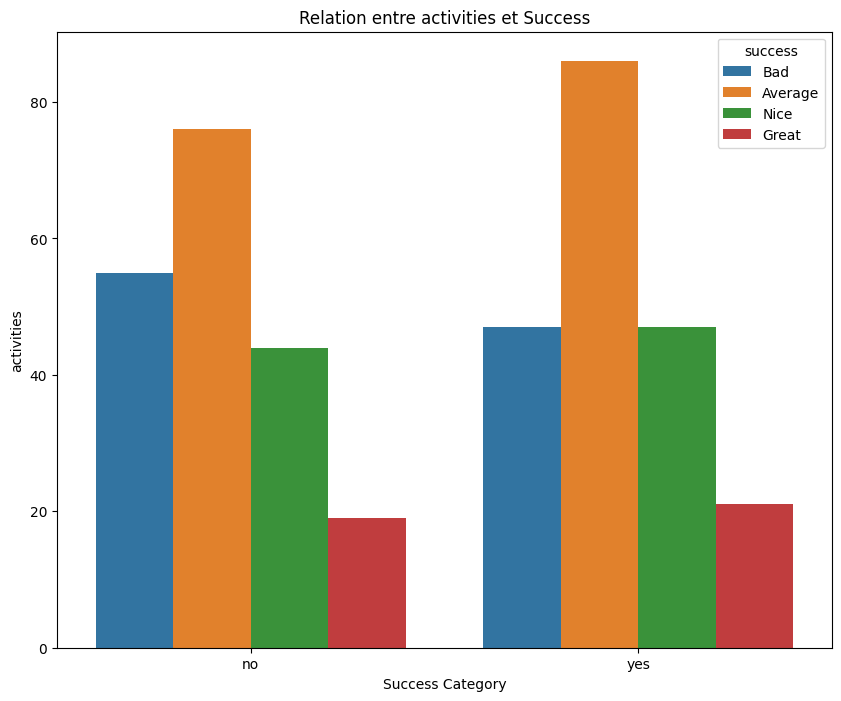

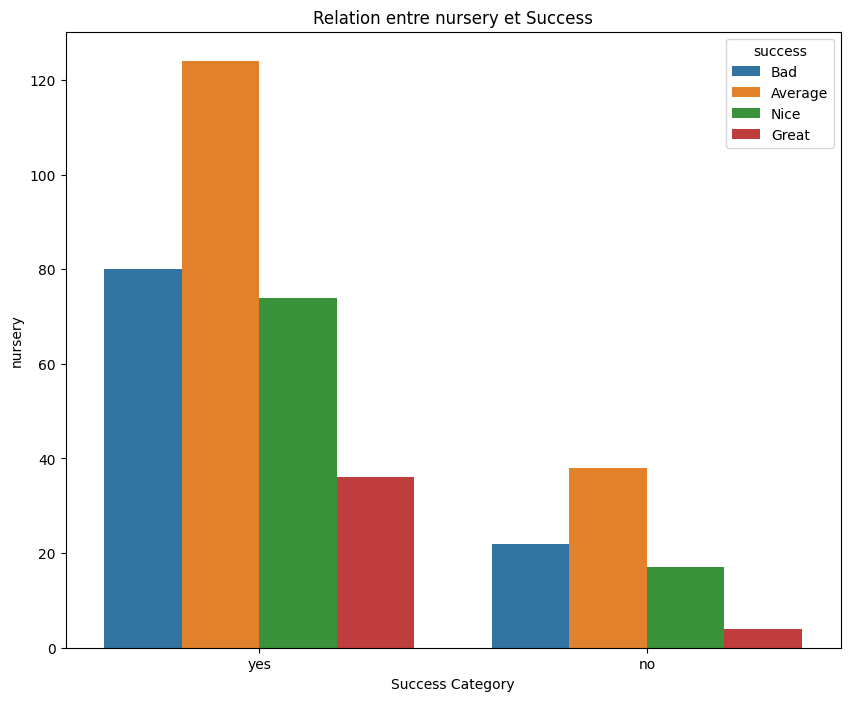

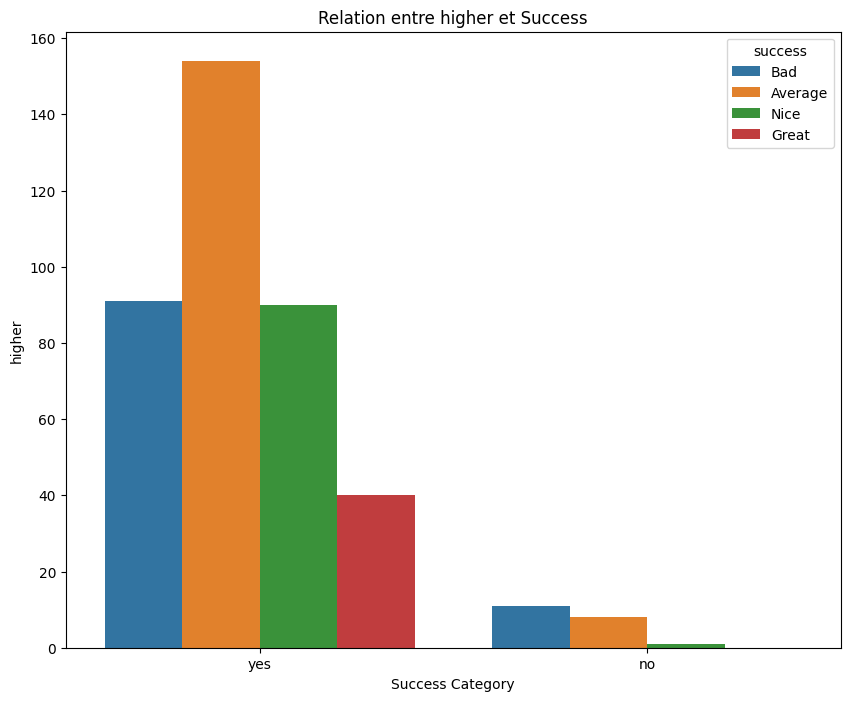

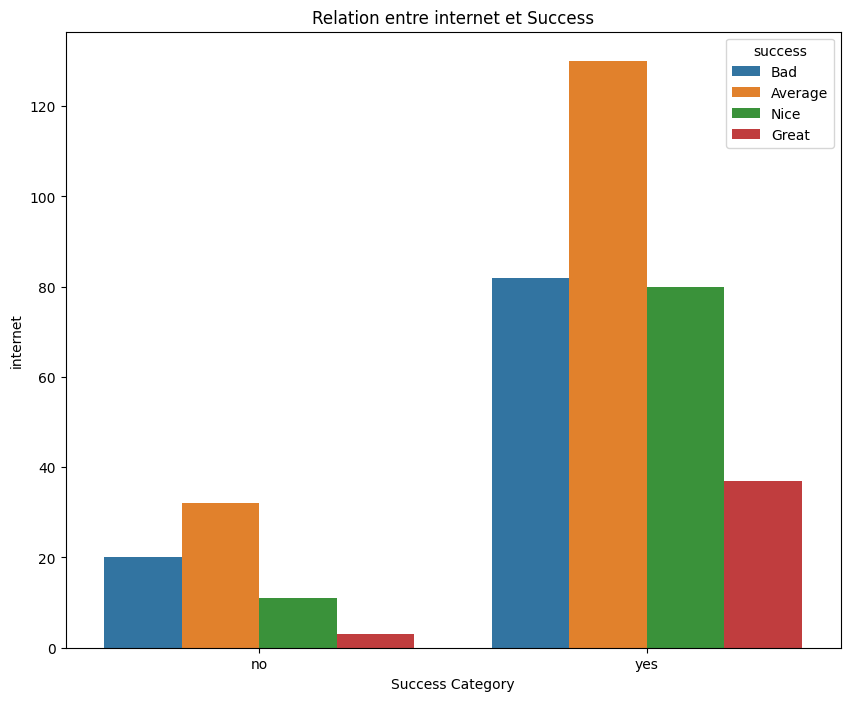

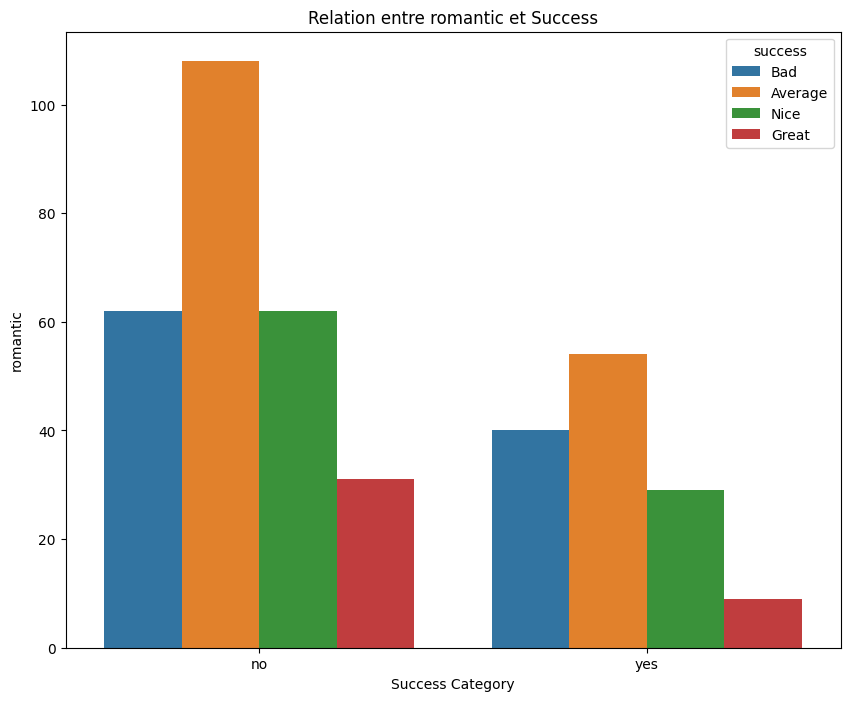

In [ ]:
for var in cat_vars:
  plt.figure(figsize=(10,8))
  sns.countplot(x = df[var], hue = df["success"])
  plt.title(f"Relation entre {var} et Success")
  plt.ylabel(var)
  plt.xlabel("Success Category")
  plt.show()

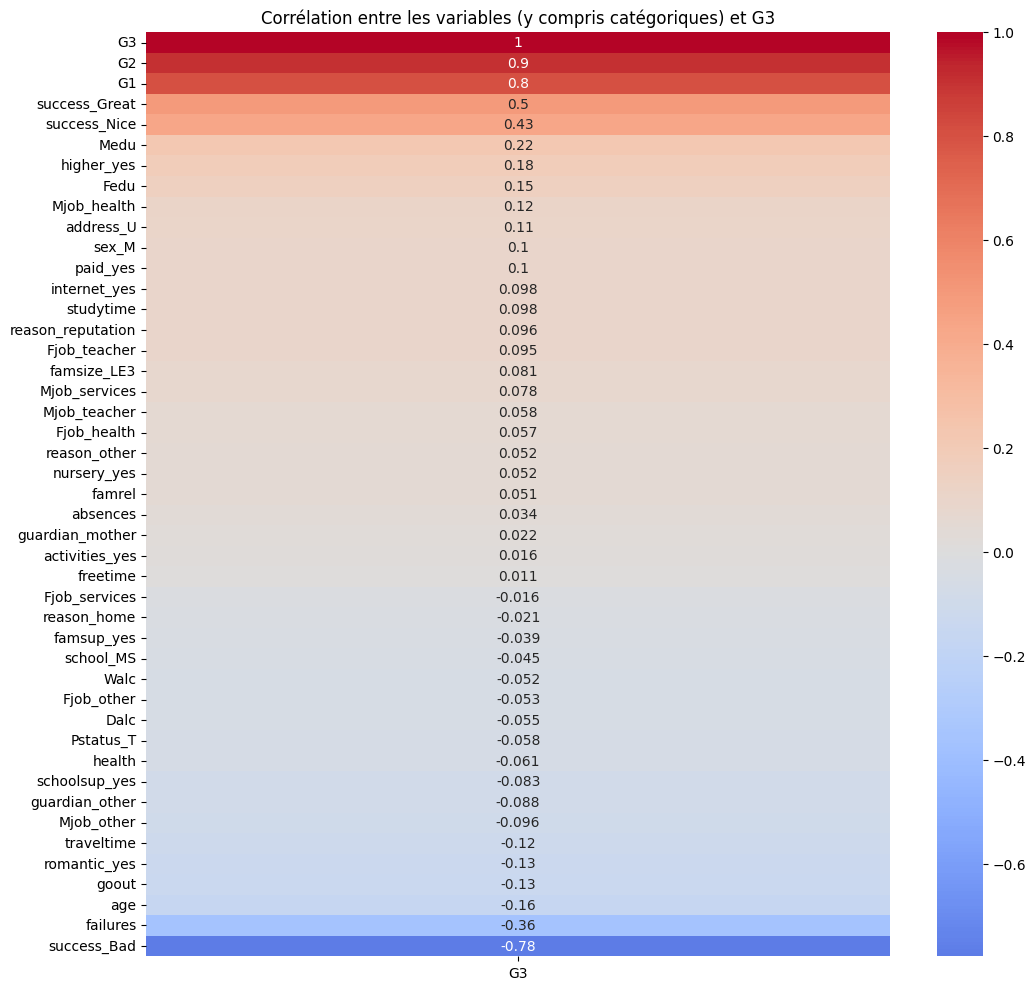

In [ ]:
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()

# Vérifier si success est dans cat_vars, sinon l'ajouter
if "success" not in cat_vars:
    cat_vars.append("success")

# One-Hot Encoding pour les variables catégoriques
df_encoded = pd.get_dummies(df_encoded, columns=cat_vars, drop_first=True)

# Recalculer la matrice de corrélation avec G3
cor_matrix_cat = df_encoded.corr()

# Afficher la heatmap des corrélations avec G3
plt.figure(figsize=(12, 12))
sns.heatmap(cor_matrix_cat[["G3"]].sort_values(by="G3", ascending=False), annot=True, cmap="coolwarm", center=0)
plt.title("Corrélation entre les variables (y compris catégoriques) et G3")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# Now we want to encode every categorical variable regarding its properties:
df_encoded = df.copy()

# One Hot Encoding for variable without ordinality (and not too many different values)
one_hot_vars = ["school", "sex", "address","famsize","Pstatus","Mjob","Fjob",
                "reason","guardian", "schoolsup","famsup","paid","activities",
                "nursery","higher","internet","romantic"]

df_encoded = pd.get_dummies(df_encoded, columns=one_hot_vars, drop_first=True)


# Ordinal Encoding for variables with ordinality
ordinal_vars = ["Medu","Fedu","success"]
ordinal_mapping = OrdinalEncoder()
df_encoded[ordinal_vars] = ordinal_mapping.fit_transform(df_encoded[ordinal_vars])
df_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,success,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4.0,4.0,2,2,0,4,3,4,1,1,3,6,5,6,6,1.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False
1,17,1.0,1.0,1,2,0,5,3,3,1,1,3,4,5,5,6,1.0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False
2,15,1.0,1.0,1,2,3,4,3,2,2,3,3,10,7,8,10,0.0,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False
3,15,4.0,2.0,1,3,0,3,2,2,1,1,5,2,15,14,15,3.0,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True
4,16,3.0,3.0,1,2,0,4,3,2,1,2,5,4,6,10,10,0.0,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1,2,2,5,5,4,4,5,4,11,9,9,9,0.0,True,True,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,True,False,False
391,17,3.0,1.0,2,1,0,2,4,5,3,4,2,3,14,16,16,2.0,True,True,True,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False
392,21,1.0,1.0,1,1,3,5,5,3,3,3,3,3,10,8,7,1.0,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
393,18,3.0,2.0,3,1,0,4,4,1,3,4,5,0,11,12,10,0.0,True,True,False,True,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,success
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Bad
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Bad
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Average
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Nice
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Average


In [ ]:
# Now our datset is ready to go through a model

# Let's first work with a classification model with success variable

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_encoded.drop(columns = ['G1', 'G2','G3','success'])
Y = df_encoded["success"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

In [ ]:
# Build
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

#Predict
preds = log_reg.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, preds)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(Y_test, preds))

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, preds)


Accuracy: 0.40336134453781514
              precision    recall  f1-score   support

         0.0       0.36      0.70      0.48        40
         1.0       0.76      0.35      0.48        37
         2.0       0.50      0.12      0.19        17
         3.0       0.24      0.20      0.22        25

    accuracy                           0.40       119
   macro avg       0.47      0.34      0.34       119
weighted avg       0.48      0.40      0.38       119



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
conf_matrix # results interpretation
"""
1ere ligne (Great)
24 éléments ont été correctement classés comme Great (True Positives).
13 éléments ont été faussement classés comme Nice alors qu'ils étaient en réalité Great.
3 éléments ont été faussement classés comme Average.
16 éléments ont été faussement classés comme Bad.
2e ligne (Nice):
18 éléments ont été faussement classés comme Great alors qu'ils étaient en réalité Nice.
10 éléments ont été correctement classés comme Nice.
0 éléments ont été faussement classés comme Average.
2 éléments ont été faussement classés comme Bad.
3e ligne (Average):
3 éléments ont été faussement classés comme Great alors qu'ils étaient en réalité Average.
0 éléments ont été faussement classés comme Nice.
3 éléments ont été correctement classés comme Average.
3 éléments ont été faussement classés comme Bad.
4e ligne (Bad):
11 éléments ont été faussement classés comme Great alors qu'ils étaient en réalité Bad.
3 éléments ont été faussement classés comme Nice.
3 éléments ont été faussement classés comme Average.
7 éléments ont été correctement classés comme Bad
"""

"\n1ere ligne (Great)\n24 éléments ont été correctement classés comme Great (True Positives).\n13 éléments ont été faussement classés comme Nice alors qu'ils étaient en réalité Great.\n3 éléments ont été faussement classés comme Average.\n16 éléments ont été faussement classés comme Bad.\n2e ligne (Nice):\n18 éléments ont été faussement classés comme Great alors qu'ils étaient en réalité Nice.\n10 éléments ont été correctement classés comme Nice.\n0 éléments ont été faussement classés comme Average.\n2 éléments ont été faussement classés comme Bad.\n3e ligne (Average):\n3 éléments ont été faussement classés comme Great alors qu'ils étaient en réalité Average.\n0 éléments ont été faussement classés comme Nice.\n3 éléments ont été correctement classés comme Average.\n3 éléments ont été faussement classés comme Bad.\n4e ligne (Bad):\n11 éléments ont été faussement classés comme Great alors qu'ils étaient en réalité Bad.\n3 éléments ont été faussement classés comme Nice.\n3 éléments ont ét

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
#Instantiation
RF = RandomForestClassifier()
#Fit
RF.fit(X_train,Y_train)

# Predict
preds = RF.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, preds)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(Y_test, preds))

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, preds)


Accuracy: 0.3445378151260504
              precision    recall  f1-score   support

         0.0       0.34      0.65      0.44        40
         1.0       0.61      0.30      0.40        37
         2.0       0.00      0.00      0.00        17
         3.0       0.17      0.16      0.16        25

    accuracy                           0.34       119
   macro avg       0.28      0.28      0.25       119
weighted avg       0.34      0.34      0.31       119



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
conf_matrix

array([[30,  6,  0,  4],
       [24, 11,  0,  2],
       [11,  0,  0,  6],
       [21,  0,  0,  4]])

In [ ]:
# Not really better than logistic regression

# Let's tune the hyperparameters

from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [20,50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 5, 10, 20],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimal d'échantillons dans une feuille
}

# Appliquer GridSearchCV
grid_search = GridSearchCV(RF, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

#grid_search	                GridSearchCV, stocke tous les résultats des tests d'hyperparamètres.
#grid_search.best_estimator_	Le meilleur modèle RandomForest trouvé après la recherche.
#grid_search.cv_results_	    Détails des performances de toutes les combinaisons testées.

# Afficher les meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Évaluer le modèle avec les meilleurs paramètres
best_rf = grid_search.best_estimator_ #Model avec best prameters
preds = best_rf.predict(X_test)
accuracy = accuracy_score(Y_test, preds)
print(f'Accuracy avec meilleurs paramètres: {accuracy:.2f}')

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Meilleurs paramètres : {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 20}
Accuracy avec meilleurs paramètres: 0.45


['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']

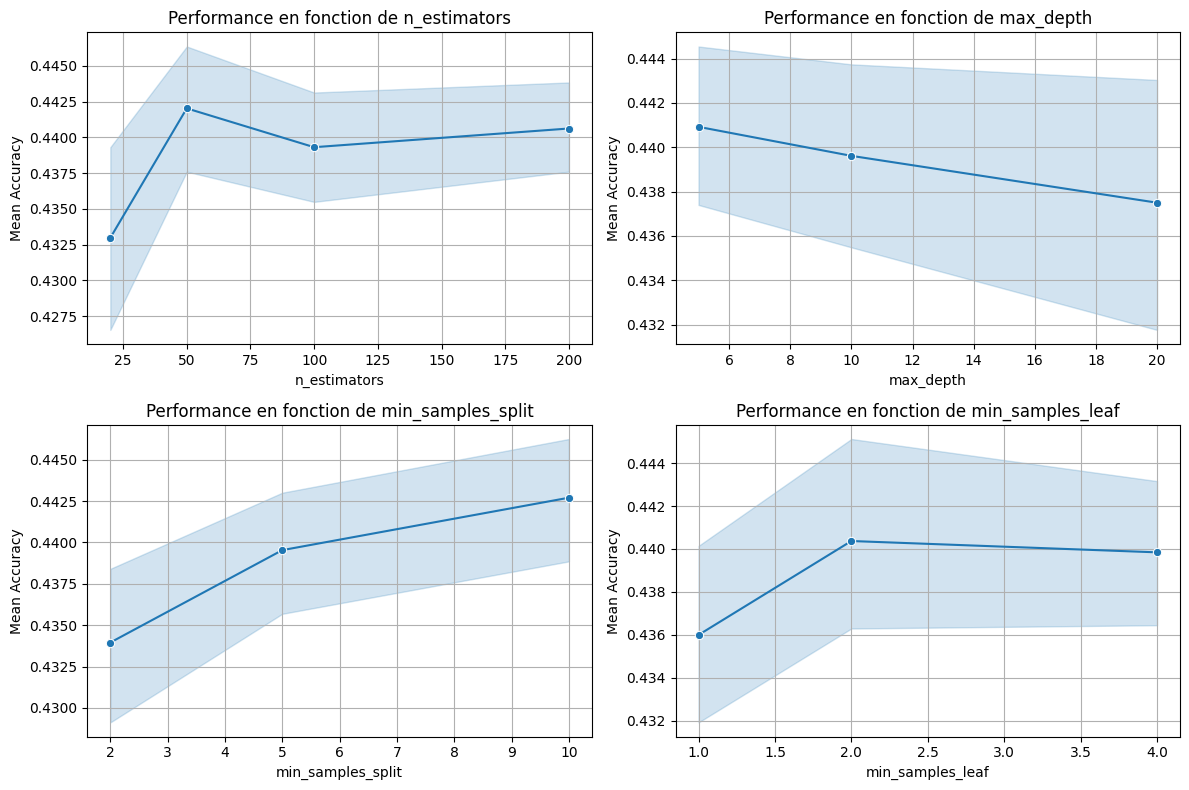

In [ ]:

# Récupérer les résultats de GridSearchCV
cv_results = pd.DataFrame(grid_search.cv_results_) # grid_search.cv_results_ => dictionnaire de liste de parametres

# Paramètres testés
param_names = list(param_grid.keys())

# Tracer l'évolution des performances en fonction de chaque hyperparamètre
plt.figure(figsize=(12, 8))

for i, param in enumerate(param_names):
    plt.subplot(2, 2, i + 1) # i+1 car les subplots ne peuvent pas commencer a 0
    sns.lineplot(
        x=cv_results[f'param_{param}'],
        y=cv_results['mean_test_score'],
        marker='o'
    )
    plt.xlabel(param)
    plt.ylabel('Mean Accuracy')
    plt.title(f'Performance en fonction de {param}')
    plt.grid()

plt.tight_layout()
plt.show()

# Dans les courbes, on peut observer des tendances, mais elles ne représentent
# pas nécessairement les meilleurs paramètres absolus. Par exemple, les
# courbes montrent comment l'accuracy change lorsque chaque paramètre est
# modifié indépendamment des autres. Lorsque tu utilises
# grid_search.best_params_, tu obtiens les meilleurs paramètres globaux,
# c'est-à-dire la combinaison exacte qui a donné la meilleure performance en
# tenant compte de l'ensemble des hyperparamètres testés simultanément.


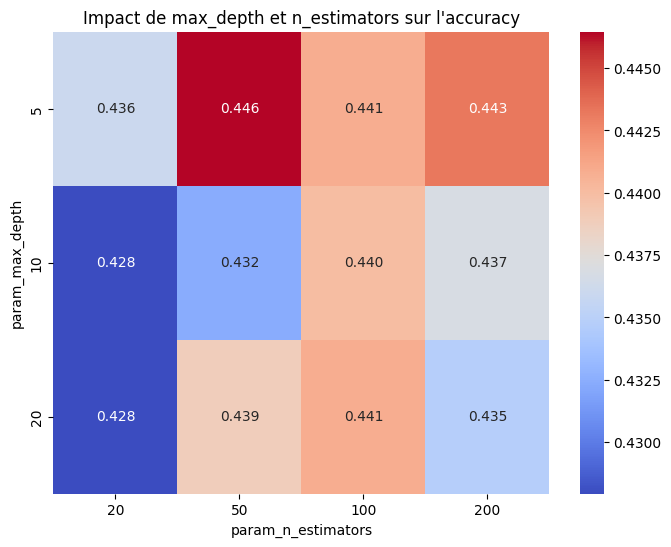

In [ ]:
# Si on veut visulliser l'impct de deux parametres en meme temps


# Récupérer les résultats de GridSearchCV
cv_results = pd.DataFrame(grid_search.cv_results_)

# Grouper par max_depth et n_estimators, puis prendre la moyenne des scores
cv_results_grouped = cv_results.groupby(['param_max_depth', 'param_n_estimators'])['mean_test_score'].mean().reset_index()

# Transformer en table pivot (pour heatmap)
pivot_table = cv_results_grouped.pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

# Affichage du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Impact de max_depth et n_estimators sur l'accuracy")
plt.show()


In [ ]:
#Pour aller plus loin : On pourrait faire le meme travail mais en régression plutot qu'en classif'